# Set up 


In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import sys
import scipy.optimize as optimize
import threading
from scipy.optimize import LinearConstraint
from datetime import datetime
import tensorflow as tf
import tensorflow_probability as tfp


C:\Users\naszh\.conda\envs\Lea\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\naszh\.conda\envs\Lea\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\naszh\.conda\envs\Lea\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\naszh\.conda\envs\Lea\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [34]:
path="./" + "sidedata/"
filename = path + "Alldata2.csv"

df=pd.read_csv(filename, index_col=None)

df = df[df["FileCondi"]!="CMat"]
df['Probtype'] = np.where(df['Stimkind']==1, "CM",
                   np.where(df['Stimkind']==0, "AN",
                   np.where(df['Stimkind']==3, 'VM',"wrong")))

df['Oldnew'] = np.where(df['Old']==1, "old",
                   np.where(df['Old']==2, "new","wrong"))
df['Error'] = 1-df['Correctness']
df_giver = df
df0=df.copy()# = df.copy()
# df_giver.columns=df_giver.columns.droplevel(1)
df_org = df[df['RT']<2000]
df_org=df[np.logical_not(np.logical_or(\
    np.logical_and.reduce((df["FileCondi"]=="MIX",df["Probtype"]=="AN",df["Oldnew"]=="new")),
          np.logical_and.reduce((df["FileCondi"]=="MIX2",df["Probtype"]=="AN",df["Oldnew"]=="new"))))]
df = df_org.groupby(["Oldnew","Setsize","Probtype","Lag","Error","FileCondi"])[["RT"]].agg(["mean"])
# df[["Correctness","Error"]]
# df.groupby("Error")
df.index.name = 'Setsize'
df.reset_index(inplace=True)
# df["Error"]


df_err = df_org.groupby(["Oldnew","Setsize","Probtype","Lag","FileCondi"])[["Error"]].agg(["mean"]).reset_index()
df_crt = df_org[df_org["Error"]==0].\
groupby(["Oldnew","Setsize","Probtype","Lag","FileCondi"])[["RT"]].agg(["mean"]).reset_index()

df_err.columns = df_err.columns.droplevel(1)
df_crt.columns = df_crt.columns.droplevel(1)

df_err = df_err.reset_index()
df_crt = df_crt.reset_index()


# df_err.reindex(np.arange(1,df_err.shape[0]))
# df_crt.reindex(np.arange(1,df_crt.shape[0]))

In [39]:
df[ np.logical_and.reduce((df["FileCondi"]=="MIX",df["Probtype"]=="AN"))]

,Oldnew,Setsize,Probtype,Lag,Error,FileCondi,RT
,,,,,,,mean
31,old,2,AN,1,0,MIX,762.742063
34,old,2,AN,1,1,MIX,1393.500000
37,old,2,AN,2,0,MIX,797.586066
40,old,2,AN,2,1,MIX,793.166667
59,old,4,AN,1,0,MIX,703.731707
62,old,4,AN,1,1,MIX,766.666667
65,old,4,AN,2,0,MIX,832.616667
68,old,4,AN,2,1,MIX,753.833333
71,old,4,AN,3,0,MIX,931.042017


# R funcitons

In [21]:
%get df_giver --from Python3
# library(plyr)
library(dplyr)
library(ggplot2)
library(lattice)
library(Rmisc)
library(stringr)
library(tidyr)
library(cowplot)
library(plotly)
# source("functions_fromr.r")
d=df_giver

   Length     Class      Mode 
      168 character character 

Automatically converting the following non-factors to factors: Subnum, Old, Setsize, Stimkind

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Removed 56 rows containing missing values (geom_errorbar)."
Warning message:
"Removed 3 rows containing missing values (geom_point)."
Automatically converting the following non-factors to factors: Subnum, Old, Setsize, Stimkind

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Removed 56 rows containing missing values (geom_errorbar)."
Automatically converting the following non-factors to factors: Subnum, Old, Setsize, Stimkind

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



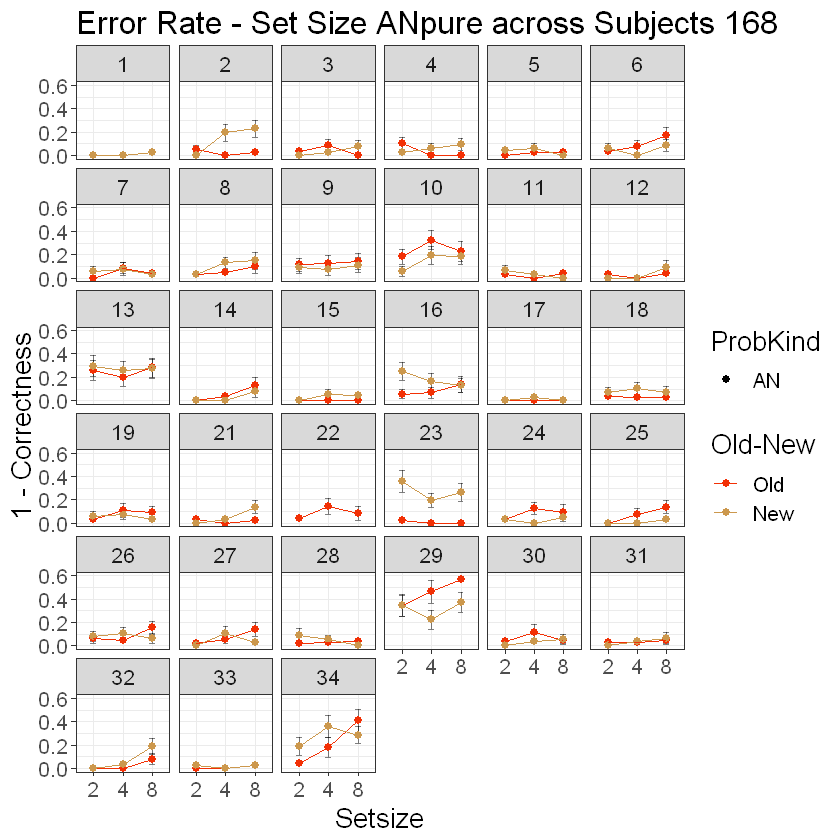

Warning message:
"Removed 106 rows containing missing values (geom_errorbar)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."
Automatically converting the following non-factors to factors: Subnum, Old, Setsize, Stimkind

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



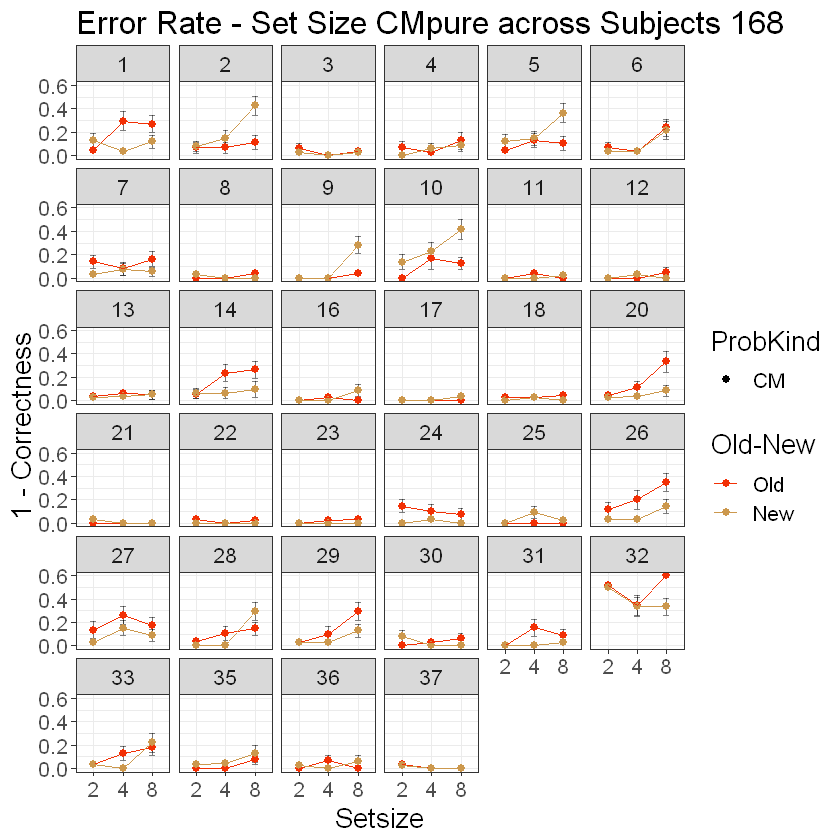

Warning message:
"Removed 115 rows containing missing values (geom_errorbar)."
Warning message:
"Removed 5 rows containing missing values (geom_point)."
Automatically converting the following non-factors to factors: Subnum, Old, Setsize, Stimkind

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



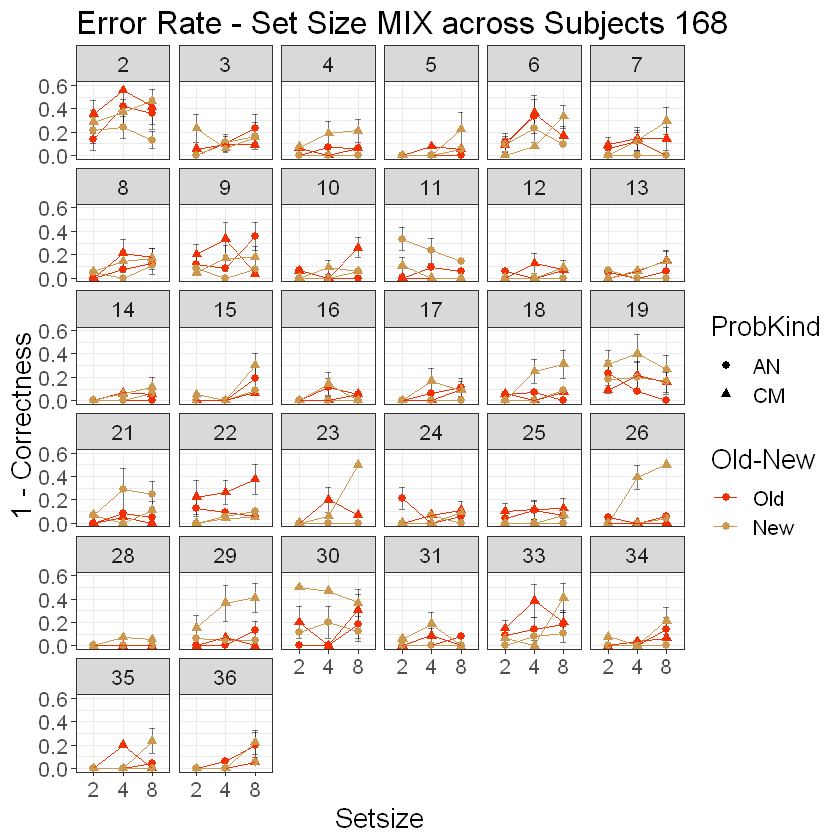

Warning message:
"Removed 36 rows containing missing values (geom_errorbar)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."


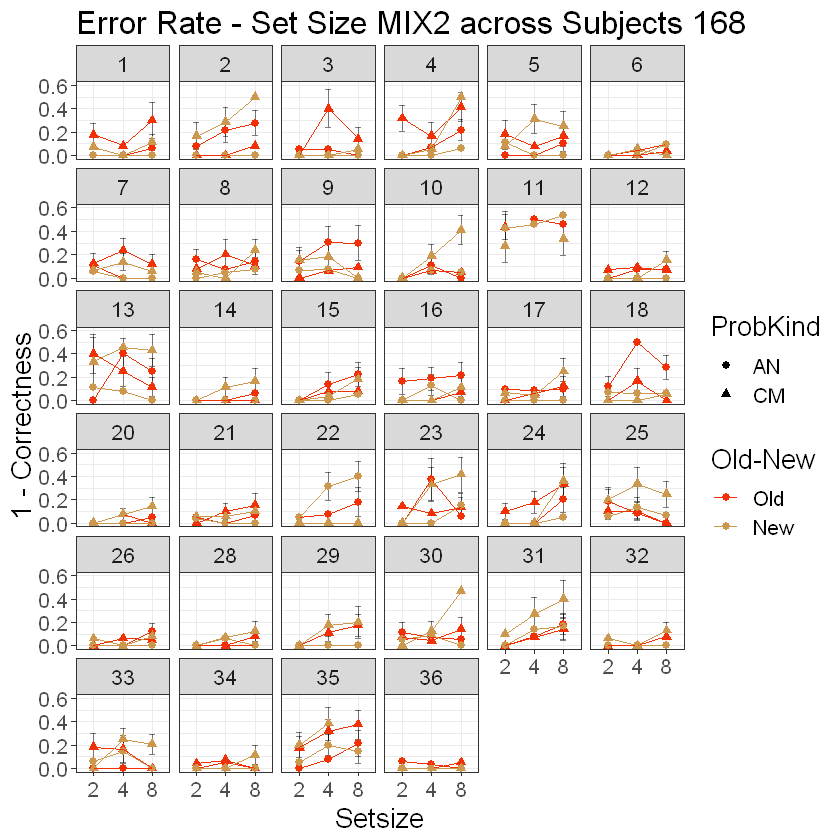

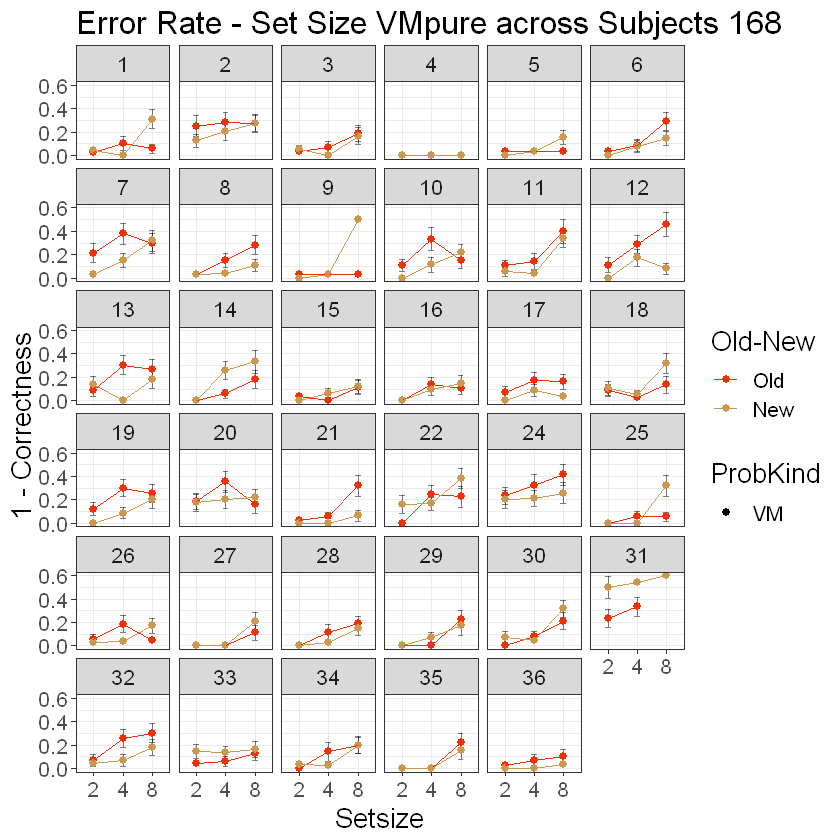

In [7]:
dx=d%>%group_by(Subnum,FileCondi) %>%dplyr::summarise(n())
summary(dx$FileCondi)
all_subnum=length(dx$Subnum)
p.ERdif=function(condition,d){
  tit=paste(condition,'across Subjects',all_subnum)
  d0= d%>% filter(FileCondi==condition)
  dase=summarySEwithin(data=d0,measurevar = "Correctness",withinvars =
                         c("Subnum","Old","Setsize","Stimkind"))
  # print(dase)
  da1se=dase
  p=ggplot(data=da1se,aes(Setsize,1-Correctness))+
    geom_errorbar(aes(ymin=(1-Correctness)-se, ymax=(1-Correctness)+se), width=.2,
                 position=position_dodge(.9),alpha=0.5) +
  geom_point(aes(color=as.factor(Old),shape=as.factor(Stimkind),group=Old),size=2)+
  geom_line(aes(color=as.factor(Old),#linetype=as.factor(FileCondi),
                group=interaction(Old,Stimkind)))+
  scale_color_manual(name="Old-New",#breaks=c(1,0),
                      labels=c(`1`="Old", `2`="New"),
                      values=c("#F23005","#CC984D"))+
  scale_shape_discrete(
    name="ProbKind",labels = c(`1`="CM",`0`="AN",`3`="VM"))+
  # scale_linetype_discrete(
  #   name="Condition")+
  ggtitle(paste("Error Rate - Set Size",tit))+
     theme_bw()+
    theme(text=element_text(size=16))+
    # ylim(700,1550)+
  facet_wrap(Subnum~.)+
    scale_y_continuous("Probability of Error")+
    ylim(c(0,0.6))
    print(p)
  
   return (p)
}
for( iname in levels(as.factor(d$FileCondi))){
#     print(iname)
    p.ERdif(iname,d) #11.... 
}

#ANpure : 29, 34?
#CMpure: 32?
#Mix2: 11
#VMpure 31



Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Removed 16 rows containing missing values (geom_errorbar)."
Warning message:
"Removed 7 rows containing missing values (geom_point)."
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Removed 12 rows containing missing values (geom_errorbar)."
Warning message:
"Removed 5 rows containing missing values (geom_point)."
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



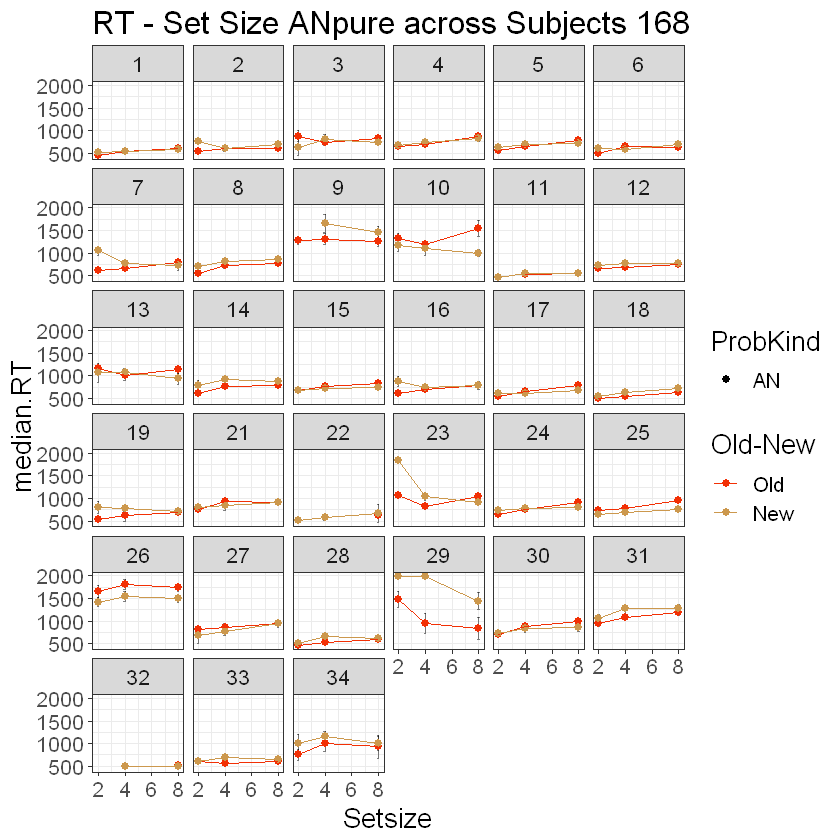

Warning message:
"Removed 18 rows containing missing values (geom_errorbar)."
Warning message:
"Removed 4 rows containing missing values (geom_point)."
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



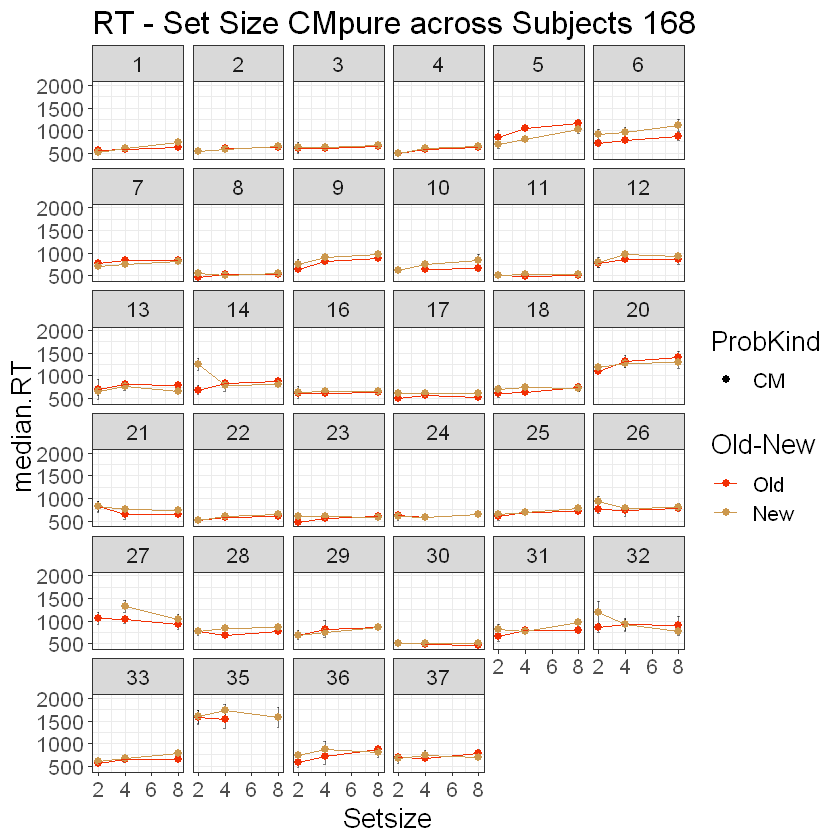

Warning message:
"Removed 21 rows containing missing values (geom_errorbar)."
Warning message:
"Removed 3 rows containing missing values (geom_point)."
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



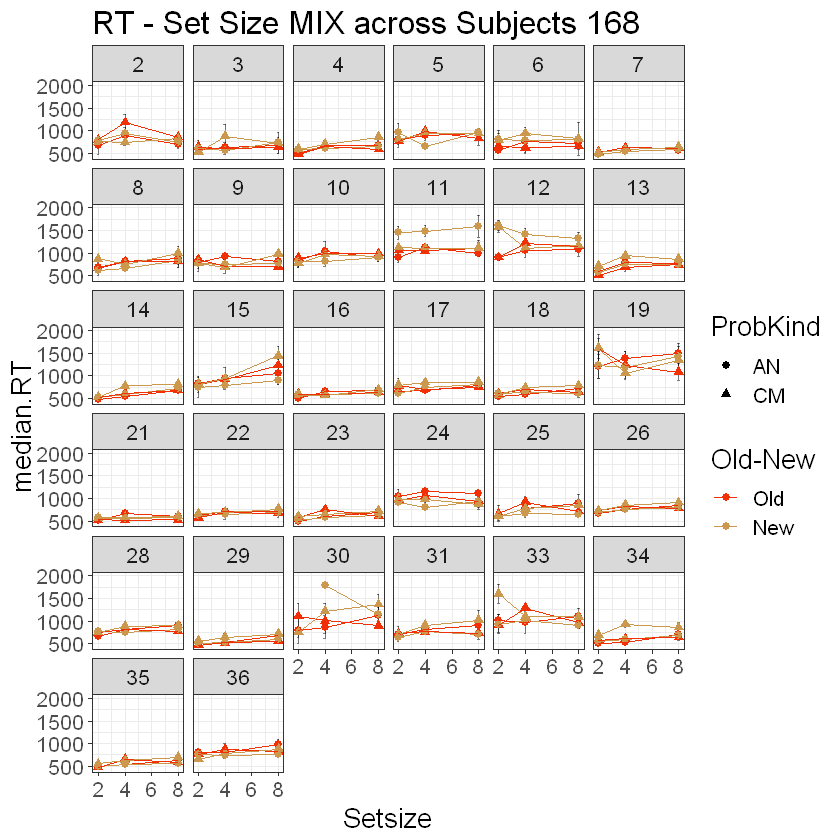

Warning message:
"Removed 10 rows containing missing values (geom_errorbar)."
Warning message:
"Removed 4 rows containing missing values (geom_point)."


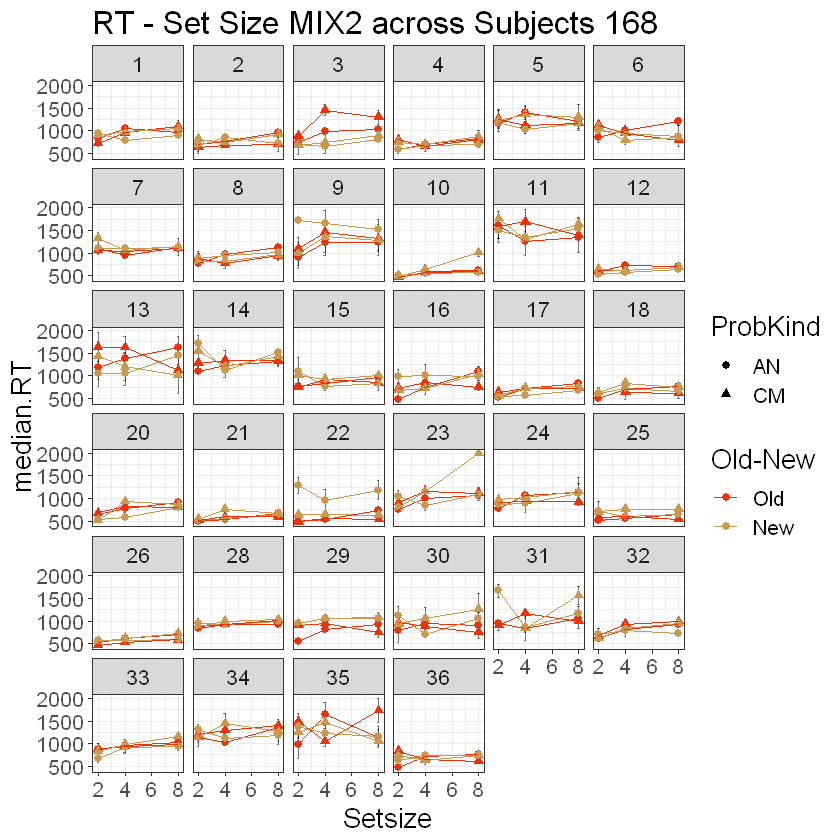

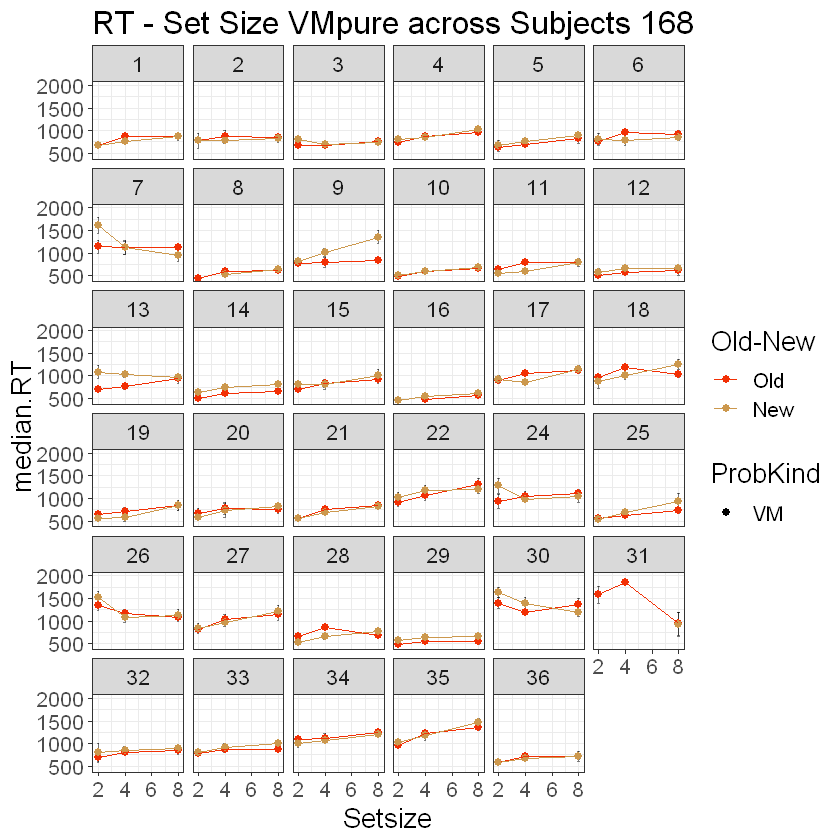

In [9]:
p.RTdif=function(condition,d){
  tit=paste(condition,'across Subjects',all_subnum)
  
  # condition="ANpure"
  d0= d%>% filter(FileCondi==condition)
  dase=d0 %>% group_by(Subnum,Old,Setsize,Stimkind,Correctness) %>%
    dplyr::summarise(median.RT=median(RT),se=sd(RT)/sqrt(n()))

  # print(dase)
  da1se=dase %>% filter(Correctness==1)
  p=ggplot(data=da1se,aes(Setsize,median.RT))+
    geom_errorbar(aes(ymin=(median.RT)-se, ymax=(median.RT)+se), width=.2,
                 position=position_dodge(.9),alpha=0.5) +
  geom_point(aes(color=as.factor(Old),shape=as.factor(Stimkind),group=Old),size=2)+
  geom_line(aes(color=as.factor(Old),#linetype=as.factor(FileCondi),
                group=interaction(Old,Stimkind)))+
  scale_color_manual(name="Old-New",#breaks=c(1,0),
                      labels=c(`1`="Old", `2`="New"),
                      values=c("#F23005","#CC984D"))+
  scale_shape_discrete(
    name="ProbKind",labels = c(`1`="CM",`0`="AN",`3`="VM"))+
  # scale_linetype_discrete(
  #   name="Condition")+
  ggtitle(paste("RT - Set Size",tit))+
     theme_bw()+
    theme(text=element_text(size=16))+
    # ylim(700,1550)+
  facet_wrap(Subnum~.)+
    scale_y_continuous("Response Time")+
    ylim(c(450,2000))
    print(p)
   return (p)
}
for( iname in levels(as.factor(d$FileCondi))){
    p.RTdif(iname,d)
}

#ANpure : 29, 34?
#CMpure: 32?
#Mix2: 11 - yeah maybe
#VMpure 31 - definatly


In [24]:
d_clean = d%>% filter(!(FileCondi=="ANpure" & Subnum==29)) %>%
    filter(!(FileCondi=="CMpure" & Subnum==32)) %>%
    filter(!(FileCondi=="MIX2" & Subnum==11) )%>%
    filter(!(FileCondi=="VMpure" & Subnum==31))


Automatically converting the following non-factors to factors: FileCondi, Old, Setsize, Stimkind

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



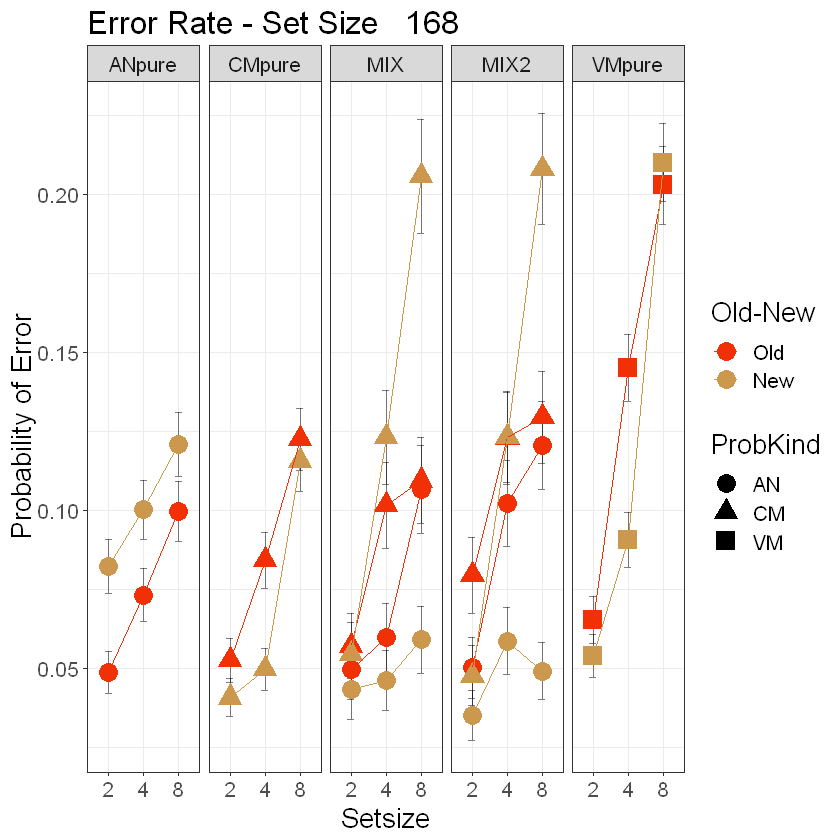

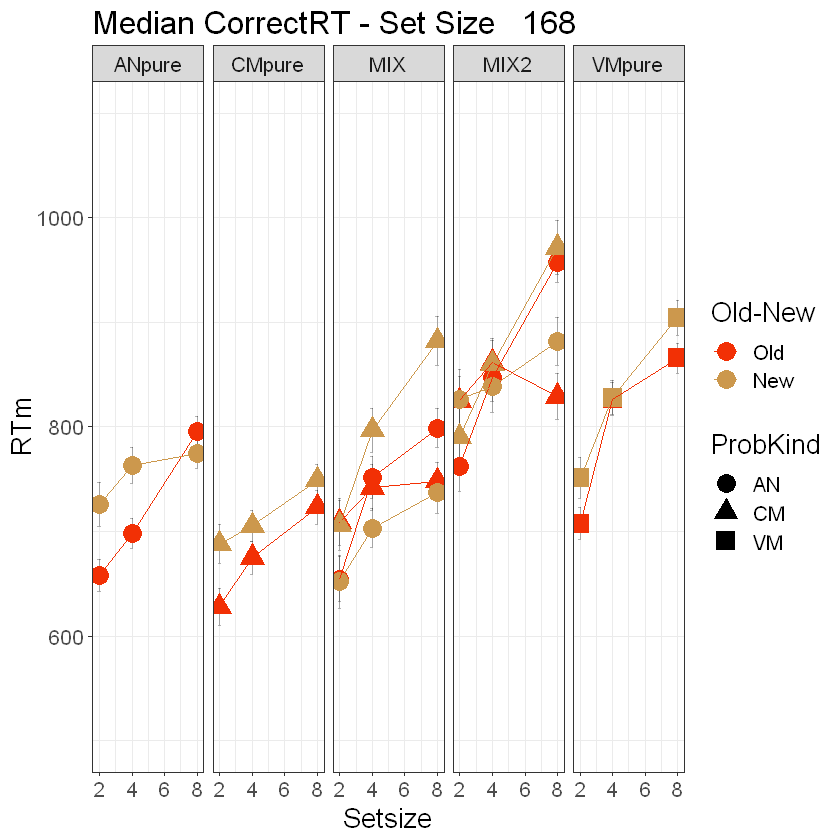

In [27]:
p.medianRT=function(d,tit,BlockFilter){
  cols <- c(`1`=1,`0`=2,`3`=3)
  
  tit=paste(' ',all_subnum," ",tit)
  dase = d %>% filter(Block %in% BlockFilter) %>%
  group_by(FileCondi,Correctness,  Old,Setsize, Stimkind) %>%
  dplyr::summarize(RTm= median(RT),
            se =sd(RT)/sqrt(n()))
  # print(dase)
  da1se=subset(dase,Correctness==1)#;da1se
  p=ggplot(data=da1se,aes(Setsize,RTm))+
    geom_errorbar(aes(ymin=RTm-se, ymax=RTm+se), width=.2,
                 position=position_dodge(.9),alpha=0.3) +
  geom_point(aes(color=as.factor(Old),shape=as.factor(Stimkind),group=Old),size=5)+
  geom_line(aes(color=as.factor(Old),#linetype=as.factor(FileCondi),
                group=interaction(Old,Stimkind)))+
  scale_color_manual(name="Old-New",#breaks=c(1,0),
                      labels=c(`1`="Old", `2`="New"),
                      values=c("#F23005","#CC984D"))+
  scale_shape_discrete(
    name="ProbKind",labels = c(`1`="CM",`0`="AN",`3`="VM"))+
  # scale_linetype_discrete(
  #   name="Condition")+
  ggtitle(paste("Median CorrectRT - Set Size",tit))+
     theme_bw()+
    theme(text=element_text(size=16))+
    ylim(500,1100)+
  facet_wrap(FileCondi~.,ncol=6)
  # scale_colour_manual(name="Error Bars",values=cols, guide = guide_legend(shape = NULL,colour = NULL)) + 
  # scale_shape_manual(name="Bar",values=cols, guide="none") 
  
  return(p)
}
p.ER=function(d,tit,BlockFilter){
  tit=paste(' ',all_subnum," ",tit)
  d0= d %>% filter(Block %in% BlockFilter)
  dase=summarySEwithin(data=d0,measurevar = "Correctness",withinvars =
                         c("FileCondi","Old","Setsize","Stimkind"))
  # print(dase)
  da1se=dase
  p=ggplot(data=da1se,aes(Setsize,1-Correctness))+
    geom_errorbar(aes(ymin=(1-Correctness)-se, ymax=(1-Correctness)+se), width=.2,
                 position=position_dodge(.9),alpha=0.5) +
  geom_point(aes(color=as.factor(Old),shape=as.factor(Stimkind),group=Old),size=5)+
  geom_line(aes(color=as.factor(Old),#linetype=as.factor(FileCondi),
                group=interaction(Old,Stimkind)))+
  scale_color_manual(name="Old-New",#breaks=c(1,0),
                      labels=c(`1`="Old", `2`="New"),
                      values=c("#F23005","#CC984D"))+
  scale_shape_discrete(
    name="ProbKind",labels = c(`1`="CM",`0`="AN",`3`="VM"))+
  # scale_linetype_discrete(
  #   name="Condition")+
  ggtitle(paste("Error Rate - Set Size",tit))+
     theme_bw()+
    theme(text=element_text(size=16))+
    ylim(0,0.25)+
  facet_wrap(FileCondi~.,ncol=6)+
    scale_y_continuous("Probability of Error")
  return(p)
}
p3=p.ER(d," ",2:9)
p3
p2=p.medianRT(d," ",2:9)
p2

In [ ]:
write.csv(file="Alldata2.csv",d)
d%>%filter(FileCondi=="MIX")

In [4]:
# levels(as.factor(df_giver$FileCondi))
files = c('ANpure' ,'CMpure', 'MIX', 'MIX2', 'VMpure')
c("alpha","beta","s",paste("c",files,sep="_"),paste(rep(c("BDDo","BDDn"),5),rep(files,each=2),sep="_"),
 "t0","t0an","kappa",
 'F_ANpure_AN_oldiold_oldinew',
 'F_CMpure_CM_oldiold_oldinew',
 'L_CMpure_CM_oldiold_newinew',
 'L_CMpure_CM_oldinew_newiold',
 'F_VMpure_VM_oldiold_oldinew',
 'L_VMpure',
 'F_MIX_CM_oldiold_oldinew',
 'L_MIX_CM_oldiold_newinew',
 'L_MIX_CM_oldinew_newiold',
 'F_MIX_AN_oldiold_oldinew',
 'F_MIX2_CM_oldiold_oldinew',
 'L_MIX2_CM_oldiold_newinew',
 'L_MIX2_CM_oldinew_newiold',
 'F_MIX2_AN_oldiold_oldinew')


[1] "alpha"                       "beta"                       
 [3] "s"                           "c_ANpure"                   
 [5] "c_CMpure"                    "c_MIX"                      
 [7] "c_MIX2"                      "c_VMpure"                   
 [9] "BDDo_ANpure"                 "BDDn_ANpure"                
[11] "BDDo_CMpure"                 "BDDn_CMpure"                
[13] "BDDo_MIX"                    "BDDn_MIX"                   
[15] "BDDo_MIX2"                   "BDDn_MIX2"                  
[17] "BDDo_VMpure"                 "BDDn_VMpure"                
[19] "t0"                          "t0an"                       
[21] "kappa"                       "F_ANpure_AN_oldiold_oldinew"
[23] "F_CMpure_CM_oldiold_oldinew" "L_CMpure_CM_oldiold_newinew"
[25] "L_CMpure_CM_oldinew_newiold" "F_VMpure_VM_oldiold_oldinew"
[27] "L_VMpure"                    "F_MIX_CM_oldiold_oldinew"   
[29] "L_MIX_CM_oldiold_newinew"    "L_MIX_CM_oldinew_newiold"   
[31] "F_MIX_AN_oldiold_oldinew"    "F_MIX2_CM_oldiold_oldinew"  
[33] "L_MIX2_CM_oldiold_newinew"   "L_MIX2_CM_oldinew_newiold"  
[35] "F_MIX2_AN_oldiold_oldinew"

    for icondi in filecondis:
        x=threading.Thread(target=work_thread_p,args=(icondi,))
        threads.append(x)
        x.start()
    for icondi, thread in enumerate(threads):
        thread.join()

# Some global setting

In [3]:
global vary_ss, give_c2
vary_ss=0
give_c2=0

global nameset

nameset = df_org["FileCondi"].astype("category").cat.categories.to_numpy()

# ALL Parameter

In [4]:
global alpha, beta, s, c ,Old_crit ,New_crit ,\
    t0 ,kao , F, L, c2
  
alpha={}; beta ={}; s = {}; F = {}; L = {}; c={}; t0={}; Old_crit={}; New_crit={}


# boost = 1.05
alpha["all"] = 0.19
# alpha['CM'] = 0.1969 
# alpha['VM'] = 0.1969 
# alpha["AN"]=0.84

beta["all"] =1.2
# beta['CM'] = 1.228
# beta['VM'] = 1.228
# beta["AN"]= 1.708

s["all"]=0.01
s["ss24"]=0.01
s["ss8"]=0.01
# s["AN"] = 0.01
# s["CM"] = 0.02
# s["VM"] = 0.02
c["ANpure"] = 0.3938
c["CMpure"] = 0.3938
c["VMpure"] = 0.3938
c["MIX"] = 0.3938
c["MIX2"] = 0.3938
# c["CMat"] = 0.3938
c2=0.3
Old_crit["ANpure"] = 1.9197
New_crit["ANpure"] = -2.33
Old_crit["CMpure"] = 1.9197
New_crit["CMpure"] = -2.33
Old_crit["VMpure"] = 1.9197
New_crit["VMpure"] = -2.33
Old_crit["MIX"] = 1.9197
New_crit["MIX"] = -2.33
Old_crit["MIX2"] = 1.9197
New_crit["MIX2"] = -2.33

t0["all"] = 699.98
t0["ann"] =  699.98
kao = 37

#---CM
F["ANpure_AN_oldiold_oldinew"] = 0.2

F["CMpure_CM_oldiold_oldinew"] = 0.2
L["CMpure_CM_oldiold_newinew"] = 0.2
L["CMpure_CM_oldinew_newiold"] = 0

F["VMpure_VM_oldiold_oldinew"] = 0.2
L["VMpure"] = 0.2 

F["MIX_CM_oldiold_oldinew"] = 0.2
L["MIX_CM_oldiold_newinew"] = 0.2
L["MIX_CM_oldinew_newiold"] = 0.2
F["MIX_AN_oldiold_oldinew"] = 0.2

F["MIX2_CM_oldiold_oldinew"] = 0.2
L["MIX2_CM_oldiold_newinew"] = 0.2
L["MIX2_CM_oldinew_newiold"] = 0.2
F["MIX2_AN_oldiold_oldinew"] = 0.2




# Assign LTM global

In [5]:
def assign_LTM_global(Filecondi,item_condi, walk, item):
    
    global F,L,Fnow,Lnow
    if Filecondi != "VMpure":
        if item_condi == "CM":

            if walk+"i"+item == "oldiold" or walk+"i"+item == "oldinew":

                Fnow = F[Filecondi+"_CM_oldiold_oldinew"]
            else: Fnow = 0

            if walk+"i"+item == "oldiold" or walk+"i"+item == "newinew":

                Lnow = L[Filecondi+"_CM_oldiold_newinew"]
            elif walk+"i"+item == "oldinew" or walk+"i"+item == "newiold":

                Lnow = L[Filecondi+"_CM_oldinew_newiold"]
            else: Lnow=0

        elif item_condi == "AN":

            if walk+"i"+item == "oldiold" or walk+"i"+item == "oldinew":

                Fnow = F[Filecondi+"_AN_oldiold_oldinew"]
            else: Fnow=0

            Lnow = 0
            
        else: print("wrong condi 1",Filecondi,item_condi, walk+"i"+item)
            
    elif Filecondi == "VMpure":
        
        if item_condi == "VM":
            if walk+"i"+item == "oldiold" or walk+"i"+item == "oldinew":
                Fnow = F["VMpure_VM_oldiold_oldinew"]
            else: Fnow = 0
        else: print("wrong condi 2")
            
        Lnow = L["VMpure"]
    else:
        print("wrong filecondi")
    
    return(Fnow + Lnow)

assign_LTM_global("MIX","AN","old","old")


0.2

# Calc A (activation)

In [6]:

def calcA(df):

    
    dnow = df
    a = np.zeros((dnow.shape[0], 8))  #activation
    

    betanow=beta["all"] 
    alphanow=alpha["all"]
    
    m = np.array([(j**(-betanow) + alphanow) for j in np.arange(1,9)])
    
    for j in range(1,9):

        indexj = j-1
        
        
        if vary_ss==0:
            
            a[dnow["Lag"]==j,indexj] = m[indexj]
            a[dnow["Lag"]!=j,indexj] = m[indexj] * s["all"]
        else:
            a[np.logical_and(dnow["Lag"]!=j,dnow["Setsize"]!=8),indexj] = m[indexj] * s["ss24"]
            a[np.logical_and(dnow["Lag"]!=j,dnow["Setsize"]==8),indexj] = m[indexj] * s["ss8"]
            a[dnow["Lag"]==j,indexj] = m[indexj]
        
        
#         print(m[indexj] * s["all"])
    for i in range(a.shape[0]): a[i,dnow['Setsize'].iloc[i]:] = 0 #a_ij suit for the correct amount of setsize
    debug = 0
    if debug==1:
        for i in range(a.shape[0]):
            print(i, "begin\n","a is",a[i].round(5),\
                  "\n m is", np.array(m).round(3),"\n Probtype is",\
                  "\n Lag is ",dnow['Lag'].iloc[i],\
                  "\n Setsize is", dnow["Setsize"].iloc[i],\
                  "\n Probtype:",\
                  dnow["Probtype"].iloc[i],\
                  "\n Oldnew: ",dnow["Oldnew"].iloc[i],\
                  "\n Ai is", a[i,:].sum().round(2),\
                  "\n snow", s["all"],\
                 "\n------------------------------------------------" )

    
    A = a.sum(axis = 1)
    
    return(A)

# print(calcA(df))

A0=calcA(df)
show =[df["FileCondi"].iloc[i]+\
        "-- "+A0[i].round(5).astype(str)+\
      "--"+ df["Setsize"].iloc[i].astype(str)+\
      "--"+df["Probtype"].iloc[i]+\
      "--"+df["Oldnew"].iloc[i] for i in range(A0.size)]
print(np.sort(show))

['ANpure-- 0.01815--2--AN--new' 'ANpure-- 0.01815--2--AN--new'
 'ANpure-- 0.02652--4--AN--new' 'ANpure-- 0.02652--4--AN--new'
 'ANpure-- 0.03853--8--AN--new' 'ANpure-- 0.03853--8--AN--new'
 'ANpure-- 0.30827--8--AN--old' 'ANpure-- 0.30827--8--AN--old'
 'ANpure-- 0.32246--8--AN--old' 'ANpure-- 0.32246--8--AN--old'
 'ANpure-- 0.34194--8--AN--old' 'ANpure-- 0.34194--8--AN--old'
 'ANpure-- 0.37014--8--AN--old' 'ANpure-- 0.37014--8--AN--old'
 'ANpure-- 0.40219--4--AN--old' 'ANpure-- 0.40219--4--AN--old'
 'ANpure-- 0.4142--8--AN--old' 'ANpure-- 0.4142--8--AN--old'
 'ANpure-- 0.47953--4--AN--old' 'ANpure-- 0.47953--4--AN--old'
 'ANpure-- 0.49153--8--AN--old' 'ANpure-- 0.49153--8--AN--old'
 'ANpure-- 0.63718--2--AN--old' 'ANpure-- 0.63718--2--AN--old'
 'ANpure-- 0.64555--4--AN--old' 'ANpure-- 0.64555--4--AN--old'
 'ANpure-- 0.65755--8--AN--old' 'ANpure-- 0.65755--8--AN--old'
 'ANpure-- 1.19625--2--AN--old' 'ANpure-- 1.19625--2--AN--old'
 'ANpure-- 1.20462--4--AN--old' 'ANpure-- 1.20462--4--AN-

# Calc p (drift rate)

In [8]:
df

,Oldnew,Setsize,Probtype,Lag,Error,FileCondi,RT
,,,,,,,mean
0,new,2,AN,0,0,ANpure,816.343927
1,new,2,AN,0,0,MIX,746.881279
2,new,2,AN,0,0,MIX2,896.760000
3,new,2,AN,0,1,ANpure,801.656250
4,new,2,AN,0,1,MIX,844.000000
...,...,...,...,...,...,...,...
230,old,8,VM,6,1,VMpure,956.250000
231,old,8,VM,7,0,VMpure,971.861386
232,old,8,VM,7,1,VMpure,937.729730


In [7]:
# F["AN_oldiold_oldinew"] = 0.099
def calcp(df):
    
    A = calcA(df)
    dnow = df
    p = np.repeat(3.0, A.shape[0])
#     print(p.size)
    filecondis = dnow["FileCondi"].astype("category").cat.categories.to_numpy() #get categories name

    for icondi in filecondis:
        
        #only ieterate through probs in that condition
        probs = dnow[dnow["FileCondi"]==icondi]["Probtype"].astype("category").cat.categories.to_numpy()
        for iprob in probs:

            for ion in ["old","new"]:
                    
                tf_ion = (dnow['Oldnew'] == ion)
                tf_iprob = (dnow['Probtype'] == iprob)
                tf_icondi = (dnow["FileCondi"] == icondi)
                
                tf_combi1 = np.logical_and(tf_ion, tf_iprob)
                tf_all = np.logical_and(tf_combi1,tf_icondi)

                IR_old_current = assign_LTM_global(icondi,iprob,"old",ion)
                IR_new_current = assign_LTM_global(icondi, iprob,"new",ion)
#                 print("**",icondi,iprob,"oldi"+ion+"--",IR_old_current,
#                       "newi"+ion+"--",IR_new_current)

                p[tf_all] = (A[tf_all] + IR_old_current)/(A[tf_all] + IR_old_current + c[icondi] + IR_new_current)
#                 print(tf_all.sum(),"***")
#                 print("**",icondi,iprob,"oldi"+ion+"--",IR_old_current,
#                                       "newi"+ion+"--",IR_new_current, p[tf_all])

    return(np.array(p))


p0=calcp(df)
show =[df["FileCondi"].iloc[i]+\
       "--"+df["Probtype"].iloc[i]+\
       "--"+ df["Setsize"].iloc[i].astype(str)+\
       "--"+df["Oldnew"].iloc[i]+\
       "-- "+p0[i].round(5).astype(str) for i in range(A0.size)]
print(np.sort(show))


['ANpure--AN--2--new-- 0.35649' 'ANpure--AN--2--new-- 0.35649'
 'ANpure--AN--2--old-- 0.68009' 'ANpure--AN--2--old-- 0.68009'
 'ANpure--AN--2--old-- 0.78001' 'ANpure--AN--2--old-- 0.78001'
 'ANpure--AN--4--new-- 0.36517' 'ANpure--AN--4--new-- 0.36517'
 'ANpure--AN--4--old-- 0.60462' 'ANpure--AN--4--old-- 0.60462'
 'ANpure--AN--4--old-- 0.6331' 'ANpure--AN--4--old-- 0.6331'
 'ANpure--AN--4--old-- 0.68225' 'ANpure--AN--4--old-- 0.68225'
 'ANpure--AN--4--old-- 0.78103' 'ANpure--AN--4--old-- 0.78103'
 'ANpure--AN--8--new-- 0.37722' 'ANpure--AN--8--new-- 0.37722'
 'ANpure--AN--8--old-- 0.56345' 'ANpure--AN--8--old-- 0.56345'
 'ANpure--AN--8--old-- 0.57021' 'ANpure--AN--8--old-- 0.57021'
 'ANpure--AN--8--old-- 0.57916' 'ANpure--AN--8--old-- 0.57916'
 'ANpure--AN--8--old-- 0.59147' 'ANpure--AN--8--old-- 0.59147'
 'ANpure--AN--8--old-- 0.60933' 'ANpure--AN--8--old-- 0.60933'
 'ANpure--AN--8--old-- 0.63716' 'ANpure--AN--8--old-- 0.63716'
 'ANpure--AN--8--old-- 0.6853' 'ANpure--AN--8--old-- 0.68

In [10]:
# time1=time.time()

# print("time",time.time()-time1)
# p0=calcp(df)
# show =[df["FileCondi"].iloc[i]+\
#        "--"+df["Probtype"].iloc[i]+\
#        "--"+ df["Setsize"].iloc[i].astype(str)+\
#        "--"+df["Oldnew"].iloc[i]+\
#        "-- "+p0[i].round(5).astype(str) for i in range(A0.size)]
# print(np.sort(show))


dd = df[df['FileCondi']=="MIX"]
p0=calcA(dd)
show =[dd["FileCondi"].iloc[i]+\
       "--"+dd["Probtype"].iloc[i]+\
       "--"+ dd["Setsize"].iloc[i].astype(str)+\
       "--"+dd["Oldnew"].iloc[i]+\
       "-- "+p0[i].round(5).astype(str) for i in range(p0.size)]
print(np.sort(show))

['MIX--AN--2--new-- 0.01815' 'MIX--AN--2--new-- 0.01815'
 'MIX--AN--2--old-- 0.63718' 'MIX--AN--2--old-- 0.63718'
 'MIX--AN--2--old-- 1.19625' 'MIX--AN--2--old-- 1.19625'
 'MIX--AN--4--new-- 0.02652' 'MIX--AN--4--new-- 0.02652'
 'MIX--AN--4--old-- 0.40219' 'MIX--AN--4--old-- 0.40219'
 'MIX--AN--4--old-- 0.47953' 'MIX--AN--4--old-- 0.47953'
 'MIX--AN--4--old-- 0.64555' 'MIX--AN--4--old-- 0.64555'
 'MIX--AN--4--old-- 1.20462' 'MIX--AN--4--old-- 1.20462'
 'MIX--AN--8--new-- 0.03853' 'MIX--AN--8--new-- 0.03853'
 'MIX--AN--8--old-- 0.30827' 'MIX--AN--8--old-- 0.30827'
 'MIX--AN--8--old-- 0.32246' 'MIX--AN--8--old-- 0.32246'
 'MIX--AN--8--old-- 0.34194' 'MIX--AN--8--old-- 0.34194'
 'MIX--AN--8--old-- 0.37014' 'MIX--AN--8--old-- 0.37014'
 'MIX--AN--8--old-- 0.4142' 'MIX--AN--8--old-- 0.4142'
 'MIX--AN--8--old-- 0.49153' 'MIX--AN--8--old-- 0.49153'
 'MIX--AN--8--old-- 0.65755' 'MIX--AN--8--old-- 1.21663'
 'MIX--CM--2--new-- 0.01815' 'MIX--CM--2--new-- 0.01815'
 'MIX--CM--2--old-- 0.63718' 'MIX

# RW 

In [8]:

def calc_theoretical_RW(df, which):
    
    #which = "err" or 'crt'

    A = calcA(df)
    p = calcp(df)
    q = 1-p
    
    dnow = df
    filecondis = dnow["FileCondi"].astype("category").cat.categories.to_numpy() #get categories name
    
    p_resp_old = np.zeros(p.size)
    pred_correct = np.zeros(p.size)
    pred_rt = np.zeros(p.size)

    theta1 = np.zeros(p.size)
    theta2 = np.zeros(q.size)
    theta11 = np.zeros(p.size)
    theta22 = np.zeros(q.size)
    exp_nstep = np.zeros(p.shape[0])
    
    for ifile in filecondis: 
        
        gen_tf = dnow["FileCondi"]==ifile
        AA = Old_crit[ifile]
        BB = -New_crit[ifile] # bb is a postive number
        
        if which=="crt":
            
            pq = (p[gen_tf]/q[gen_tf])
            theta1[gen_tf] = (pq**(AA+BB)+1)/(pq**(AA+BB)-1)
            theta2[gen_tf] = (pq**BB+1)/(pq**BB-1)

            tf = np.logical_and.reduce((p!=q , dnow["Oldnew"]=='old', gen_tf))
            exp_nstep[tf] = (1/(p[tf]-q[tf]))*(theta1[tf]*(AA+BB) - theta2[tf]*BB)

            tf = np.logical_and.reduce((p==q , dnow["Oldnew"]=='old', gen_tf))
            exp_nstep[tf] = (AA/3)*(2*BB+AA)
            
            theta11[gen_tf] = (pq**(-(AA+BB))+1)/(pq**(-(AA+BB))-1)
            theta22[gen_tf] = (pq**-AA+1)/(pq**-AA-1)

            tf = np.logical_and.reduce((p!=q , dnow["Oldnew"]=='new', gen_tf))
            exp_nstep[tf] = (1/(q[tf]-p[tf]))*(theta11[tf]*(AA+BB) - theta22[tf]*AA)

            tf = np.logical_and.reduce((p==q , dnow["Oldnew"]=='new', gen_tf))
            exp_nstep[tf] = (BB/3)*(2*AA+BB)
            
#             if ifile!= "MIX" and ifile!="MIX2":
#                 pred_rt[gen_tf] = t0["all"] + kao * exp_nstep[gen_tf]

        #------------------- correct response
        elif which == "err":
            
            qp = (q[gen_tf]/p[gen_tf])
            qptfn =np.logical_and(p!=q,gen_tf)
            qptf =np.logical_and(p==q,gen_tf)

            p_resp_old[qptfn] = ((1-qp**BB)/(1-qp**(AA+BB)))[p[gen_tf]!=q[gen_tf]]
            p_resp_old[qptf] = BB/(AA+BB)
    #------------------
#     else: 
#                 print(ifile)
    if which=="crt":
        suprise = np.logical_and.reduce((np.logical_or(dnow["FileCondi"]=="MIX",dnow["FileCondi"]=="MIX2"),
                                         dnow["Probtype"]=="AN",dnow["Oldnew"]=="new"))
        notsuprise = np.logical_not(suprise)

#         pred_rt[suprise] = t0["all"] + kao * exp_nstep[suprise]
        pred_rt[suprise] = t0["ann"] + kao * exp_nstep[suprise]
        pred_rt[notsuprise] = t0["all"] + kao * exp_nstep[notsuprise]
#     for i in range(df.size):
#         print(df["FileCondi"][i],df["Probtype"][i],df["Oldnew"][i],suprise[i])

    #------------------
            
    if which == "err":
        pred_correct[dnow["Oldnew"]=='old'] = p_resp_old[dnow["Oldnew"]=="old"]
        pred_correct[dnow["Oldnew"]=="new"] = 1-p_resp_old[dnow["Oldnew"]=="new"]

    

    
    if which == "crt": 
        return(np.array(pred_rt))
    elif which == "err":
        return(np.array(pred_correct))
          


# time1=time.time()
# ok1=calc_theoretical_RW(df_err,"err")
# ok2=calc_theoretical_RW(df_crt,"crt")
# print(time.time()-time1)

rw_ct=calc_theoretical_RW(df,"crt")
# show =[df["FileCondi"].iloc[i]+\
#        "--"+df["Probtype"].iloc[i]+\
#        "--"+ df["Setsize"].iloc[i].astype(str)+\
#        "--"+df["Oldnew"].iloc[i]+\
#        "-- "+RW[i].round(5).astype(str) for i in range(RW.size)]
# print(np.sort(show))

# RW=calc_theoretical_RW(df,"crt")
# show =[dd["FileCondi"].iloc[i]+\
#        "--"+dd["Probtype"].iloc[i]+\
#        "--"+ dd["Setsize"].iloc[i].astype(str)+\
#        "--"+dd["Oldnew"].iloc[i]+\
#        "-- "+RW[i].round(5).astype(str) for i in range(RW.size)]
# print(np.sort(show))




# Calculate WSSE

In [9]:
w={}
w["new_rt"] = 3 *5 #2 is how many rt more than err
w["old_rt"] = 1 *2
w["new_err"] = 1.2
w["old_err"] = 0.95
# F["AN_oldiold_oldinew"] = 0.017
def calc_wssd(df_err,df_crt):
    
    df_sub_err = df_err.copy()
    df_sub_crt = df_crt.copy()
    pred_correct = calc_theoretical_RW(df_sub_err,"err")
    pred_crt = calc_theoretical_RW(df_sub_crt,"crt")

    df_sub_crt["pred_crt"] = pred_crt/1000 #translate crt to seconds. 
    df_sub_err["pred_error"] = 1- pred_correct

    df_sub_crt["RT"]= df_sub_crt["RT"]/1000

    df_sub_crt["SSD_RT"] = ((df_sub_crt["RT"] - df_sub_crt["pred_crt"])**2).to_numpy()
    df_sub_err["SSD_err"] = ((df_sub_err["Error"] - df_sub_err["pred_error"])**2).to_numpy()

    df_sub_crt["wSSD_RT"] = [df_sub_crt.loc[i,"SSD_RT"] *\
                             w[df_sub_crt.loc[i,"Oldnew"]+"_rt"] for i in range(df_sub_crt.shape[0])]

    df_sub_err["wSSD_err"] = [df_sub_err.loc[i,"SSD_err"] *\
                             w[df_sub_err.loc[i,"Oldnew"] + "_err"] for i in range(df_sub_err.shape[0])]
    
    adj_oldnew=0
    if adj_oldnew==1:
        print("\nERR","old",df_sub_err[df_sub_err["Oldnew"]=="old"]["wSSD_err"].sum(),\
             "new",df_sub_err[df_sub_err["Oldnew"]=="new"]["wSSD_err"].sum(),
             "\nRT","old",df_sub_crt[df_sub_crt["Oldnew"]=="old"]["wSSD_RT"].sum(),\
             "new",df_sub_crt[df_sub_crt["Oldnew"]=="new"]["wSSD_RT"].sum(),)
    #     print(df_sub_err[df_sub_err["Oldnew"]=="old"].sum() + df[df_sub_crt["Oldnew"]=="new"].sum())

    WSSD = df_sub_err["wSSD_err"].sum() + df_sub_crt["wSSD_RT"].sum()
    
#     print(df_sub_crt)
    return(WSSD)

time1=time.time()
calc_wssd(df_err,df_crt)
# print(time.time()-time1)
df_crt

,index,Oldnew,Setsize,Probtype,Lag,FileCondi,RT
0,0,new,2,AN,0,ANpure,816.343927
1,1,new,2,AN,0,MIX,746.881279
2,2,new,2,AN,0,MIX2,896.760000
3,3,new,2,CM,0,CMpure,766.145590
4,4,new,2,CM,0,MIX,797.060738
...,...,...,...,...,...,...,...
114,114,old,8,VM,4,VMpure,912.040000
115,115,old,8,VM,5,VMpure,925.304762
116,116,old,8,VM,6,VMpure,988.977528
117,117,old,8,VM,7,VMpure,971.861386


In [13]:
df_crt

,index,Oldnew,Setsize,Probtype,Lag,FileCondi,RT
0,0,new,2,AN,0,ANpure,816.343927
1,1,new,2,AN,0,MIX,746.881279
2,2,new,2,AN,0,MIX2,896.760000
3,3,new,2,CM,0,CMpure,766.145590
4,4,new,2,CM,0,MIX,797.060738
...,...,...,...,...,...,...,...
114,114,old,8,VM,4,VMpure,912.040000
115,115,old,8,VM,5,VMpure,925.304762
116,116,old,8,VM,6,VMpure,988.977528
117,117,old,8,VM,7,VMpure,971.861386


# Parameter search

## Parm_dic (Initialize)

In [11]:
if vary_ss==0:
     param_dic=np.array((\
        alpha["all"],beta["all"],s["all"],
        c["ANpure"],c["CMpure"],c["VMpure"], c["MIX"] ,c["MIX2"] ,
        Old_crit["ANpure"] ,New_crit["ANpure"] ,Old_crit["CMpure"] ,New_crit["CMpure"] ,
        Old_crit["VMpure"] ,New_crit["VMpure"] ,Old_crit["MIX"] ,New_crit["MIX"] ,Old_crit["MIX2"] ,New_crit["MIX2"] ,
        t0["all"] ,t0["ann"] ,kao,
        F["ANpure_AN_oldiold_oldinew"] ,F["CMpure_CM_oldiold_oldinew"] ,L["CMpure_CM_oldiold_newinew"] ,L["CMpure_CM_oldinew_newiold"] ,
        F["VMpure_VM_oldiold_oldinew"] , L["VMpure"], 
        F["MIX_CM_oldiold_oldinew"], L["MIX_CM_oldiold_newinew"], L["MIX_CM_oldinew_newiold"], F["MIX_AN_oldiold_oldinew"], 
        F["MIX2_CM_oldiold_oldinew"], L["MIX2_CM_oldiold_newinew"], L["MIX2_CM_oldinew_newiold"], F["MIX2_AN_oldiold_oldinew"]))
else:
     param_dic=np.array((alpha["all"], beta["all"], s["ss24"], s["ss8"],
                         c, Old_crit, New_crit, t0, kao,
                         F["CM_oldiold_oldinew"], L["CM_oldiold_newinew"], L["CM_oldinew_newiold"],
                         F["AN_oldiold_oldinew"]))
         
param_dic

array([ 1.9000e-01,  1.2000e+00,  1.0000e-02,  3.9380e-01,  3.9380e-01,
        3.9380e-01,  3.9380e-01,  3.9380e-01,  1.9197e+00, -2.3300e+00,
        1.9197e+00, -2.3300e+00,  1.9197e+00, -2.3300e+00,  1.9197e+00,
       -2.3300e+00,  1.9197e+00, -2.3300e+00,  6.9998e+02,  6.9998e+02,
        3.7000e+01,  2.0000e-01,  2.0000e-01,  2.0000e-01,  0.0000e+00,
        2.0000e-01,  2.0000e-01,  2.0000e-01,  2.0000e-01,  2.0000e-01,
        2.0000e-01,  2.0000e-01,  2.0000e-01,  2.0000e-01,  2.0000e-01])

## optim_wsse (function)

In [40]:
def optim_wsse(params_dic):
    global alpha, beta, s, c ,Old_crit ,New_crit ,\
        t0 ,kao ,F, L

    alpha={}; beta ={}; s = {}; F = {}; L = {}; c={}; t0={}; Old_crit={}; New_crit={}
    
    # print(params)  # <-- you'll see that params is a NumPy array
    if vary_ss==0:
        [alpha["all"],beta["all"],s["all"],
        c["ANpure"],c["CMpure"],c["VMpure"], c["MIX"] ,c["MIX2"] ,
        Old_crit["ANpure"] ,New_crit["ANpure"] ,Old_crit["CMpure"] ,New_crit["CMpure"] ,
        Old_crit["VMpure"] ,New_crit["VMpure"] ,Old_crit["MIX"] ,New_crit["MIX"] ,Old_crit["MIX2"] ,New_crit["MIX2"] ,
        t0["all"] ,t0["ann"] ,kao,
        F["ANpure_AN_oldiold_oldinew"] ,F["CMpure_CM_oldiold_oldinew"] ,L["CMpure_CM_oldiold_newinew"] ,L["CMpure_CM_oldinew_newiold"] ,
        F["VMpure_VM_oldiold_oldinew"] , L["VMpure"], 
        F["MIX_CM_oldiold_oldinew"], L["MIX_CM_oldiold_newinew"], L["MIX_CM_oldinew_newiold"], F["MIX_AN_oldiold_oldinew"], 
        F["MIX2_CM_oldiold_oldinew"], L["MIX2_CM_oldiold_newinew"], L["MIX2_CM_oldinew_newiold"], F["MIX2_AN_oldiold_oldinew"]] = params_dic
    

    return calc_wssd(df_err,df_crt)

optim_wsse(param_dic)

7.114712121399563

## random start

In [41]:
def random_start():
    global alpha, beta, s, c ,Old_crit ,New_crit ,\
    t0 ,kao , F, L
  
    alpha={}; beta ={}; s = {}; F = {}; L = {}

    alpha["all"] = np.random.uniform(0.1,3)
    beta["all"] = np.random.uniform(0.01,4)
    s["all"]= np.random.uniform(0.01,0.999)
    c["ANpure"] = np.random.uniform(0.01,0.99)
    c["CMpure"] = np.random.uniform(0.01,0.99)
    c["VMpure"] = np.random.uniform(0.01,0.99)
    c["MIX"] = np.random.uniform(0.01,0.99)
    c["MIX2"] = np.random.uniform(0.01,0.99)

    Old_crit["ANpure"] = np.random.uniform(1,10)
    New_crit["ANpure"] = np.random.uniform(-10,1)
    Old_crit["CMpure"] = np.random.uniform(1,10)
    New_crit["CMpure"] = np.random.uniform(-10,1)
    Old_crit["VMpure"] = np.random.uniform(1,10)
    New_crit["VMpure"] = np.random.uniform(-10,1)
    Old_crit["MIX"] = np.random.uniform(1,10)
    New_crit["MIX"] = np.random.uniform(-10,1)
    Old_crit["MIX2"] = np.random.uniform(1,10)
    New_crit["MIX2"] = np.random.uniform(1,10)

    t0["all"] =  np.random.uniform(1,900)
    t0["ann"] =  np.random.uniform(1,900)
    kao = np.random.uniform(1,100)

    #---CM
    F["ANpure_AN_oldiold_oldinew"] = np.random.uniform(0.0001,1)

    F["CMpure_CM_oldiold_oldinew"] = np.random.uniform(0.0001,1)
    L["CMpure_CM_oldiold_newinew"] = np.random.uniform(0.0001,1)
    L["CMpure_CM_oldinew_newiold"] = np.random.uniform(0.0001,1)
    
    F["VMpure_VM_oldiold_oldinew"] = np.random.uniform(0.0001,1) 
    L["VMpure"] = np.random.uniform(0.0001,1) 

    F["MIX_CM_oldiold_oldinew"] = np.random.uniform(0.0001,1)
    L["MIX_CM_oldiold_newinew"] = np.random.uniform(0.0001,1)
    L["MIX_CM_oldinew_newiold"] = np.random.uniform(0.0001,1)
    F["MIX_AN_oldiold_oldinew"] = np.random.uniform(0.0001,1)

    F["MIX2_CM_oldiold_oldinew"] = np.random.uniform(0.0001,1)
    L["MIX2_CM_oldiold_newinew"] = np.random.uniform(0.0001,1)
    L["MIX2_CM_oldinew_newiold"] = np.random.uniform(0.0001,1)
    F["MIX2_AN_oldiold_oldinew"] = np.random.uniform(0.0001,1)
    
    if vary_ss==0:
        param_dic = \
        [alpha["all"],beta["all"],s["all"],
        c["ANpure"],c["CMpure"],c["VMpure"], c["MIX"] ,c["MIX2"] ,
        Old_crit["ANpure"] ,New_crit["ANpure"] ,Old_crit["CMpure"] ,New_crit["CMpure"] ,
        Old_crit["VMpure"] ,New_crit["VMpure"] ,Old_crit["MIX"] ,New_crit["MIX"] ,Old_crit["MIX2"] ,New_crit["MIX2"] ,
        t0["all"] ,t0["ann"] ,kao,
        F["ANpure_AN_oldiold_oldinew"] ,F["CMpure_CM_oldiold_oldinew"] ,L["CMpure_CM_oldiold_newinew"] ,L["CMpure_CM_oldinew_newiold"] ,
        F["VMpure_VM_oldiold_oldinew"] , L["VMpure"], 
        F["MIX_CM_oldiold_oldinew"], L["MIX_CM_oldiold_newinew"], L["MIX_CM_oldinew_newiold"], F["MIX_AN_oldiold_oldinew"], 
        F["MIX2_CM_oldiold_oldinew"], L["MIX2_CM_oldiold_newinew"], L["MIX2_CM_oldinew_newiold"], F["MIX2_AN_oldiold_oldinew"]]
    else:
        param_dic=[alpha["all"], beta["all"], s["ss24"], s["ss8"],
                             c, Old_crit, New_crit, t0, kao,
                             F["CM_oldiold_oldinew"], L["CM_oldiold_newinew"], L["CM_oldinew_newiold"],
                         F["AN_oldiold_oldinew"]]

    return(param_dic)



In [42]:

bdd = (
    (0.1,2.9),
    (0.01,4),
    (0.01,0.999),
    (0.01,0.99),
    (0.01,0.99),
    (0.01,0.99),
    (0.01,0.99),
    (0.01,0.99),
    (1,10),
    (-10,1),
    (1,10),
    (-10,1),
    (1,10),
    (-10,1),
    (1,10),
    (-10,1),
    (1,10),
    (-10,1),
    (300,900),
    (300,900),#t0ann
    (10,100),
    (0.0001,1),
    (0.0001,1),
    (0.0001,1),
    (0.0001,1),
    (0.0001,1),
    (0.0001,1),
    (0.0001,1),
    (0.0001,1),
    (0.0001,1),
    (0.0001,1),
    (0.0001,1),
    (0.0001,1),
    (0.0001,1),
    (0.0001,1)
      )


def Jcstrain():
    linear_constraint = LinearConstraint(\
        [[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0,  0,  0, 0,  0,  0, 0, 0,  0,  0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 1, 0, 0, -1,  0, 0,  0,  0, 0, 0,  0,  0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 1, 0, -1,  0, 0,  0,  0, 0, 0,  0,  0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1,  0,  0, 0,  0,  0, 0, 0,  0,  0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0,  0, 1, -1,  0, 0, 0,  0,  0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0,  0, 0,  0,  0, 0, 1, -1,  0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0,  1, 0,  0, -1, 0, 0,  0,  0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0,  0, 0,  0,  0, 1, 0,  0, -1],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, -1, 0,  0,  0, 1, 0,  0,  0]],\
        [0.01, 0.01,0.01, 0.01,0.01, 0.01,0.01, 0.01,0.01],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf])

    return(linear_constraint)

In [18]:

def apply_sum_constraint(inp):
    
    global alpha, beta, s, c ,Old_crit ,New_crit ,\
        t0 ,kao , F, L, c2

    alpha={}; beta ={}; s = {}; F = {}; L = {}; c={}; t0={}; Old_crit={}; New_crit={}

    [alpha["all"],beta["all"],s["all"],
    c["ANpure"],c["CMpure"],c["VMpure"], c["MIX"] ,c["MIX2"] ,
    Old_crit["ANpure"] ,New_crit["ANpure"] ,Old_crit["CMpure"] ,New_crit["CMpure"] ,
    Old_crit["VMpure"] ,New_crit["VMpure"] ,Old_crit["MIX"] ,New_crit["MIX"] ,Old_crit["MIX2"] ,New_crit["MIX2"] ,
    t0["all"] ,t0["ann"] ,kao,
    F["ANpure_AN_oldiold_oldinew"] ,F["CMpure_CM_oldiold_oldinew"] ,
     L["CMpure_CM_oldiold_newinew"] ,L["CMpure_CM_oldinew_newiold"] ,
    F["VMpure_VM_oldiold_oldinew"] , L["VMpure"], 
    F["MIX_CM_oldiold_oldinew"], L["MIX_CM_oldiold_newinew"], L["MIX_CM_oldinew_newiold"], F["MIX_AN_oldiold_oldinew"], 
    F["MIX2_CM_oldiold_oldinew"], L["MIX2_CM_oldiold_newinew"], L["MIX2_CM_oldinew_newiold"], F["MIX2_AN_oldiold_oldinew"]
    ] = inp
    
    suffice = 1 
    suffice = 1- ((np.logical_and.reduce((F["CMpure_CM_oldiold_oldinew"]>F["ANpure_AN_oldiold_oldinew"],
                                         L["CMpure_CM_oldiold_newinew"]>L["VMpure"],
                                         L["CMpure_CM_oldinew_newiold"]>L["VMpure"],
                                         F["VMpure_VM_oldiold_oldinew"]>F["ANpure_AN_oldiold_oldinew"],
                                         L["MIX_CM_oldiold_newinew"]>L["MIX_CM_oldinew_newiold"],
                                         L["MIX2_CM_oldiold_newinew"]>L["MIX2_CM_oldinew_newiold"],
                                         F["MIX_CM_oldiold_oldinew"]>F["MIX_AN_oldiold_oldinew"],
                                         F["MIX2_CM_oldiold_oldinew"]> F["MIX2_AN_oldiold_oldinew"],
                                         F["MIX2_CM_oldiold_oldinew"]> F["MIX_CM_oldiold_oldinew"]))
    return suffice

# cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
my_constraints = ({'type': 'eq', "fun": apply_sum_constraint ,
                   'jag': lambda x: np.array([[-1.0, -2.0],
...                                          [-2*x[0], -1.0],
...                                          [-2*x[0], 1.0]])})

SyntaxError: invalid syntax (<ipython-input-18-2d9b3b093ab4>, line 30)

# Actual search

In [21]:
howlong=[alpha["all"],beta["all"],s["all"],
c["ANpure"],c["CMpure"],c["VMpure"], c["MIX"] ,c["MIX2"] ,
Old_crit["ANpure"] ,New_crit["ANpure"] ,Old_crit["CMpure"] ,New_crit["CMpure"] ,
Old_crit["VMpure"] ,New_crit["VMpure"] ,Old_crit["MIX"] ,New_crit["MIX"] ,Old_crit["MIX2"] ,New_crit["MIX2"] ,
t0["all"] ,t0["ann"] ,kao,
F["ANpure_AN_oldiold_oldinew"] ,F["CMpure_CM_oldiold_oldinew"] ,L["CMpure_CM_oldiold_newinew"] ,L["CMpure_CM_oldinew_newiold"] ,
F["VMpure_VM_oldiold_oldinew"] , L["VMpure"], 
F["MIX_CM_oldiold_oldinew"], L["MIX_CM_oldiold_newinew"], L["MIX_CM_oldinew_newiold"], F["MIX_AN_oldiold_oldinew"], 
F["MIX2_CM_oldiold_oldinew"], L["MIX2_CM_oldiold_newinew"], L["MIX2_CM_oldinew_newiold"], F["MIX2_AN_oldiold_oldinew"]
]
len(howlong)

35

In [43]:
def actual_search_trust3():# 

    time1 = time.time()
    numit=15
    global fitted_params3,result
    fitted_params3 = np.zeros((numit,35))
    for i in range(0,numit):
        param_dic = random_start()
#         result = optimize.minimize(optim_wsse, param_dic,\
#                                bounds=bdd,options={'verbose': 1,"maxiter" : 800},
#                                    constraints=[Jcstrain(), ],
#                                    method='trust-constr')
        result = optimize.minimize(optim_wsse, param_dic,\
                       bounds=bdd,options={"maxiter" : 800},
                           constraints=[Jcstrain(), ])
        print(i)
        print("time:", time.time()-time1)
        if result.success:
            fitted_params3[i,:] = result.x
        else: 
            print(result.message)


    time2 = time.time()
    print(time2-time1)
# actual_search_trust3()

## tensorflow

In [30]:
def tf_optimize(params_dic):
    @tf.function
    
    
    def fn(params_dic):
        global alpha, beta, s, c ,Old_crit ,New_crit ,\
            t0 ,kao ,F, L

        alpha={}; beta ={}; s = {}; F = {}; L = {}; c={}; t0={}; Old_crit={}; New_crit={}

        # print(params)  # <-- you'll see that params is a NumPy array
        if vary_ss==0:
            [alpha["all"],beta["all"],s["all"],
            c["ANpure"],c["CMpure"],c["VMpure"], c["MIX"] ,c["MIX2"] ,
            Old_crit["ANpure"] ,New_crit["ANpure"] ,Old_crit["CMpure"] ,New_crit["CMpure"] ,
            Old_crit["VMpure"] ,New_crit["VMpure"] ,Old_crit["MIX"] ,New_crit["MIX"] ,Old_crit["MIX2"] ,New_crit["MIX2"] ,
            t0["all"] ,t0["ann"] ,kao,
            F["ANpure_AN_oldiold_oldinew"] ,F["CMpure_CM_oldiold_oldinew"] ,L["CMpure_CM_oldiold_newinew"] ,L["CMpure_CM_oldinew_newiold"] ,
            F["VMpure_VM_oldiold_oldinew"] , L["VMpure"], 
            F["MIX_CM_oldiold_oldinew"], L["MIX_CM_oldiold_newinew"], L["MIX_CM_oldinew_newiold"], F["MIX_AN_oldiold_oldinew"], 
            F["MIX2_CM_oldiold_oldinew"], L["MIX2_CM_oldiold_newinew"], L["MIX2_CM_oldinew_newiold"], F["MIX2_AN_oldiold_oldinew"]]\
            = params_dic

        return calc_wssd(df_err,df_crt)
#         return tfp.math.value_and_gradient(lambda x: rosenbrock(x, a, b), x)
#     return tfp.optimizer.bfgs_minimize(fn, init, max_iterations=100)
    return tfp.optimizer.lbfgs_minimize(fn,params_dic)

start = time.time()
opt = tf_optimize(random_start())
end = time.time()

solution = tf.stack([a, tf.square(a)], axis=-1)
solution

TypeError: in converted code:

    <ipython-input-30-d2413af0f377>:22 fn
        = params_dic
    C:\Users\naszh\.conda\envs\Lea\lib\site-packages\tensorflow\python\framework\ops.py:477 __iter__
        "Tensor objects are only iterable when eager execution is "

    TypeError: Tensor objects are only iterable when eager execution is enabled. To iterate over this tensor use tf.map_fn.


In [21]:
def fn(params_dic):
    global alpha, beta, s, c ,Old_crit ,New_crit ,\
        t0 ,kao ,F, L

    alpha={}; beta ={}; s = {}; F = {}; L = {}; c={}; t0={}; Old_crit={}; New_crit={}
    
    # print(params)  # <-- you'll see that params is a NumPy array
    if vary_ss==0:
        [alpha["all"],beta["all"],s["all"],
        c["ANpure"],c["CMpure"],c["VMpure"], c["MIX"] ,c["MIX2"] ,
        Old_crit["ANpure"] ,New_crit["ANpure"] ,Old_crit["CMpure"] ,New_crit["CMpure"] ,
        Old_crit["VMpure"] ,New_crit["VMpure"] ,Old_crit["MIX"] ,New_crit["MIX"] ,Old_crit["MIX2"] ,New_crit["MIX2"] ,
        t0["all"] ,t0["ann"] ,kao,
        F["ANpure_AN_oldiold_oldinew"] ,F["CMpure_CM_oldiold_oldinew"] ,L["CMpure_CM_oldiold_newinew"] ,L["CMpure_CM_oldinew_newiold"] ,
        F["VMpure_VM_oldiold_oldinew"] , L["VMpure"], 
        F["MIX_CM_oldiold_oldinew"], L["MIX_CM_oldiold_newinew"], L["MIX_CM_oldinew_newiold"], F["MIX_AN_oldiold_oldinew"], 
        F["MIX2_CM_oldiold_oldinew"], L["MIX2_CM_oldiold_newinew"], L["MIX2_CM_oldinew_newiold"], F["MIX2_AN_oldiold_oldinew"]] = params_dic
    

    return calc_wssd(df_err,df_crt)

optim_wsse(param_dic)

NameError: name 'fitted_params3' is not defined

## Write fine

In [84]:
fitted_params3

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0.

In [45]:
# actual_search_trust3()

def write_file(which_work):
    
    if vary_ss==0:
        Parnames = ['alpha','beta','s','c_ANpure','c_CMpure','c_MIX','c_MIX2','c_VMpure',
        'BDDo_ANpure','BDDn_ANpure','BDDo_CMpure','BDDn_CMpure','BDDo_MIX','BDDn_MIX',
        'BDDo_MIX2','BDDn_MIX2','BDDo_VMpure','BDDn_VMpure','t0','t0an','kappa',
        'F_ANpure_AN_oldiold_oldinew','F_CMpure_CM_oldiold_oldinew','L_CMpure_CM_oldiold_newinew',
        'L_CMpure_CM_oldinew_newiold','F_VMpure_VM_oldiold_oldinew','L_VMpure','F_MIX_CM_oldiold_oldinew',
        'L_MIX_CM_oldiold_newinew','L_MIX_CM_oldinew_newiold','F_MIX_AN_oldiold_oldinew',
        'F_MIX2_CM_oldiold_oldinew','L_MIX2_CM_oldiold_newinew','L_MIX2_CM_oldinew_newiold','F_MIX2_AN_oldiold_oldinew']
    else:
        Parnames = ["alpha","beta","s_ss24","s_ss8","c","old_crt","new_crt","t0",
                    "kappa","F_cmooon","L_cmoonn","L_cmonno","F_anooon"]
    fitted_params3
    fitpdf=pd.DataFrame(fitted_params3)
    fitpdf.columns=Parnames
    now = datetime.now()
    current_time = now.strftime("%m_%d_%H_%M")
#     print("Current Time =", current_time)
    fitsel=fitpdf[fitpdf["alpha"]>0]
    #------
#     print(bdd)
    bddstr=np.array(bdd).astype(str)
    bddbdd=pd.DataFrame([[bddstr[i,0]+" ~ "+bddstr[i,1] for i in range(bddstr.shape[0])]])
    bddbdd.columns=Parnames
    fitsel=fitsel.append(bddbdd, sort=False)
    # print(fitsel)
    #---------
    
    filen = which_work+"_" + current_time +".csv"
    
    fitsel.to_csv(filen)

    return(fitsel)
    

current = "alltry4_2"

fitsel=write_file(current)
fitsel

,alpha,beta,s,c_ANpure,c_CMpure,c_MIX,c_MIX2,c_VMpure,BDDo_ANpure,BDDn_ANpure,...,F_VMpure_VM_oldiold_oldinew,L_VMpure,F_MIX_CM_oldiold_oldinew,L_MIX_CM_oldiold_newinew,L_MIX_CM_oldinew_newiold,F_MIX_AN_oldiold_oldinew,F_MIX2_CM_oldiold_oldinew,L_MIX2_CM_oldiold_newinew,L_MIX2_CM_oldinew_newiold,F_MIX2_AN_oldiold_oldinew
4,0.397896,0.940053,0.0229944,0.843696,0.99,0.99,0.692812,0.99,4.22617,-5.18717,...,0.45604,0.118224,0.290263,0.147553,0.137553,0.244761,0.610383,0.0101,0.0001,0.600383
5,0.876877,1.53115,0.0203599,0.989999,0.99,0.99,0.987445,0.2779,1.42571,-6.6907,...,0.0437383,0.289241,0.0101,0.0755736,0.0655736,0.0001,1,1,0.0956866,0.99
6,0.375842,1.31468,0.0247611,0.604223,0.99,0.820815,0.434261,0.711094,3.55218,-4.69231,...,0.345986,0.0001,0.0719644,0.179876,0.169876,0.0067947,0.389679,0.0119649,0.00196489,0.379679
7,0.10241,0.360142,0.0109496,0.865888,0.989992,0.9702,0.751189,0.528069,2.87462,-6.88994,...,0.336058,0.0280037,0.370908,0.0801799,0.0701799,0.360904,0.413185,0.0136937,0.00368321,0.403185
0,0.1 ~ 2.9,0.01 ~ 4.0,0.01 ~ 0.999,0.01 ~ 0.99,0.01 ~ 0.99,0.01 ~ 0.99,0.01 ~ 0.99,0.01 ~ 0.99,1.0 ~ 10.0,-10.0 ~ 1.0,...,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0


## Well Present of parameters

In [ ]:
for i in range(fitsel.shape[0]-1):
    print(str(i)+"---------")
    for j in range(fitsel.shape[1]):
        print(fitsel.columns[j],fitsel.iloc[i,j])

In [208]:
fitsel

,alpha,beta,s,c_ANpure,c_CMpure,c_MIX,c_MIX2,c_VMpure,BDDo_ANpure,BDDn_ANpure,...,F_VMpure_VM_oldiold_oldinew,L_VMpure,F_MIX_CM_oldiold_oldinew,L_MIX_CM_oldiold_newinew,L_MIX_CM_oldinew_newiold,F_MIX_AN_oldiold_oldinew,F_MIX2_CM_oldiold_oldinew,L_MIX2_CM_oldiold_newinew,L_MIX2_CM_oldinew_newiold,F_MIX2_AN_oldiold_oldinew
3,0.287552,0.813666,0.01,0.21591,0.0100135,0.242173,0.189554,0.190815,1.2876,-1.80631,...,0.0101004,0.000100201,0.0113971,0.0122585,0.00225709,0.000100089,0.0213978,0.0101056,0.000100645,0.000100125
4,0.870904,0.543731,0.0103847,0.807176,0.0330781,0.0131061,0.0864005,0.0695043,1.03549,-4.15751,...,0.899522,0.00284793,0.228762,0.781791,0.0462772,0.0127073,0.398059,0.839107,0.0335515,0.0111781
0,0.1 ~ 3.0,0.01 ~ 4.0,0.01 ~ 0.999,0.01 ~ 0.99,0.01 ~ 0.99,0.01 ~ 0.99,0.01 ~ 0.99,0.01 ~ 0.99,1.0 ~ 10.0,-10.0 ~ 1.0,...,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0


In [147]:
OP={}
OP["ANpure_AN_oldiold_oldinew"]=1 
OP["CMpure_CM_oldiold_oldinew"]=1 
OP["CMpure_CM_oldiold_newinew"]=1 
OP["CMpure_CM_oldinew_newiold"]=1 

OP["VMpure_VM_oldiold_oldinew"]=1 
OP["VMpure"]=1

OP["MIX_CM_oldiold_oldinew"]=1
OP["MIX_CM_oldiold_newinew"]=1
OP["MIX_CM_oldinew_newiold"]=1
OP["MIX_AN_oldiold_oldinew"]=1

OP["MIX2_CM_oldiold_oldinew"]=1
OP["MIX2_CM_oldiold_newinew"]=1
OP["MIX2_CM_oldinew_newiold"]=1
OP["MIX2_AN_oldiold_oldinew"]=1

[ikey for ikey in OP.keys()]

['ANpure_AN_oldiold_oldinew',
 'CMpure_CM_oldiold_oldinew',
 'CMpure_CM_oldiold_newinew',
 'CMpure_CM_oldinew_newiold',
 'VMpure_VM_oldiold_oldinew',
 'VMpure',
 'MIX_CM_oldiold_oldinew',
 'MIX_CM_oldiold_newinew',
 'MIX_CM_oldinew_newiold',
 'MIX_AN_oldiold_oldinew',
 'MIX2_CM_oldiold_oldinew',
 'MIX2_CM_oldiold_newinew',
 'MIX2_CM_oldinew_newiold',
 'MIX2_AN_oldiold_oldinew']

In [133]:
fitted_params3


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
script_7162030730439011880 in <module>
----> fitted_params3
      

NameError: name 'fitted_params3' is not defined


## Assignresults

In [44]:
 [alpha["all"],beta["all"],s["all"],
c["ANpure"],c["CMpure"],c["VMpure"], c["MIX"] ,c["MIX2"] ,
Old_crit["ANpure"] ,New_crit["ANpure"] ,Old_crit["CMpure"] ,New_crit["CMpure"] ,
Old_crit["VMpure"] ,New_crit["VMpure"] ,Old_crit["MIX"] ,New_crit["MIX"] ,Old_crit["MIX2"] ,New_crit["MIX2"] ,
t0["all"] ,t0["ann"] ,kao,
F["ANpure_AN_oldiold_oldinew"] ,F["CMpure_CM_oldiold_oldinew"] ,L["CMpure_CM_oldiold_newinew"] ,L["CMpure_CM_oldinew_newiold"] ,
F["VMpure_VM_oldiold_oldinew"] , L["VMpure"], 
F["MIX_CM_oldiold_oldinew"], L["MIX_CM_oldiold_newinew"], L["MIX_CM_oldinew_newiold"], F["MIX_AN_oldiold_oldinew"], 
F["MIX2_CM_oldiold_oldinew"], L["MIX2_CM_oldiold_newinew"], L["MIX2_CM_oldinew_newiold"], F["MIX2_AN_oldiold_oldinew"]] =\
    fitted_params3[0]
#     [ 2.69059123e-01,  1.01173807e+00,  1.00000000e-02,
#          2.47324636e-01,  1.74913690e-01,  2.73909878e-01,
#          1.47916292e-01,  1.37776461e-01,  1.19239059e+00,
#         -2.37981688e+00,  1.65526545e+00, -1.58246249e+00,
#          1.19671695e+00, -1.73485235e+00,  2.01573662e+00,
#         -1.62492720e+00,  2.12811898e+00, -1.43638672e+00,
#          1.00000000e+00,  1.00000000e+00,  5.00000000e+00,
#          1.00000000e-04,  1.01000000e-02,  8.40294889e-02,
#          1.01000000e-02,  1.01000000e-02,  1.00000000e-04,
#          1.82072853e-02,  2.01208968e-02,  1.01208968e-02,
#          1.00000000e-04,  2.82072853e-02,  1.14222443e-02,
#          1.42224429e-03,  1.00000000e-04]#     fitted_params3[0]

NameError: name 'fitted_params3' is not defined

# Final Random Walk

In [17]:
# s_AN=0.01
# s_others = 0.07
def finalRW(df_what,kind):

    if kind == "err":
        df_what["Pred_error"] = 1-calc_theoretical_RW(df_what,kind)
    elif kind == "crt":
        df_what["Pred_cRT"]=calc_theoretical_RW(df_what,kind)
    else: print("error input of name kind")
    
    return(df_what)
finalRW(df_crt,"crt")

,index,Oldnew,Setsize,Probtype,Lag,FileCondi,RT,Pred_cRT
0,0,new,2,AN,0,ANpure,816.343927,340.716625
1,1,new,2,AN,0,MIX,746.881279,850.684784
2,2,new,2,AN,0,MIX2,896.760000,625.596316
3,3,new,2,CM,0,CMpure,766.145590,481.077688
4,4,new,2,CM,0,MIX,797.060738,1026.111343
...,...,...,...,...,...,...,...,...
114,114,old,8,VM,4,VMpure,912.040000,438.564447
115,115,old,8,VM,5,VMpure,925.304762,438.580594
116,116,old,8,VM,6,VMpure,988.977528,438.586664
117,117,old,8,VM,7,VMpure,971.861386,438.589365


## Try all plot

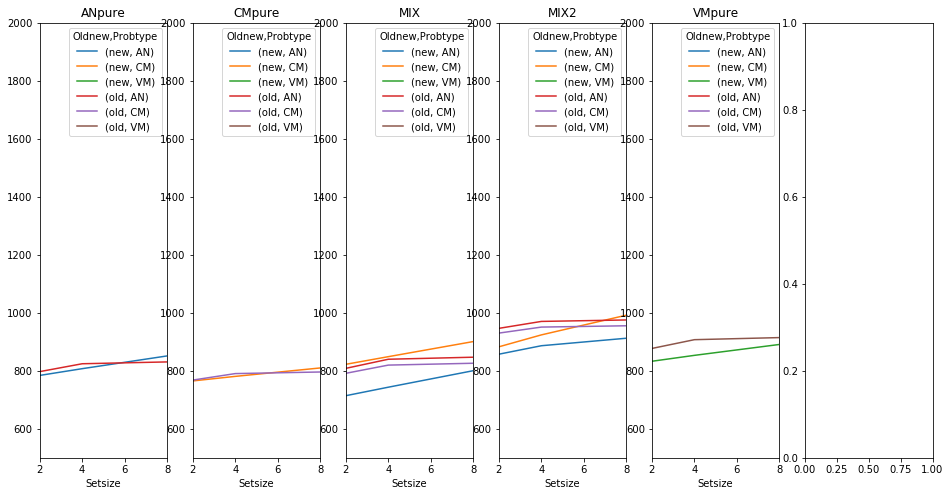

<Figure size 432x288 with 0 Axes>

In [30]:
[alpha["all"],beta["all"],s["all"],
    c["ANpure"],c["CMpure"],c["VMpure"], c["MIX"] ,c["MIX2"] ,
    Old_crit["ANpure"] ,New_crit["ANpure"] ,Old_crit["CMpure"] ,New_crit["CMpure"] ,
    Old_crit["VMpure"] ,New_crit["VMpure"] ,Old_crit["MIX"] ,New_crit["MIX"] ,Old_crit["MIX2"] ,New_crit["MIX2"] ,
    t0["all"] ,t0["ann"] ,kao,
    F["ANpure_AN_oldiold_oldinew"] ,F["CMpure_CM_oldiold_oldinew"] ,L["CMpure_CM_oldiold_newinew"] ,L["CMpure_CM_oldinew_newiold"] ,
    F["VMpure_VM_oldiold_oldinew"] , L["VMpure"], 
    F["MIX_CM_oldiold_oldinew"], L["MIX_CM_oldiold_newinew"], L["MIX_CM_oldinew_newiold"], F["MIX_AN_oldiold_oldinew"], 
    F["MIX2_CM_oldiold_oldinew"], L["MIX2_CM_oldiold_newinew"], L["MIX2_CM_oldinew_newiold"], F["MIX2_AN_oldiold_oldinew"]] =\
    [1.6205861261288248,  0.2,  0.01,  0.9899960020229178,  0.989997305885351, 
 0.9899845239478274,  0.989999546863487,  0.5356641737231739,  3.336283974964121, 
  -2.931487213477803,  3.155812289719721,  -2.7416418123801662,  3.7427211982968127, 
   -2.7643469613193927,  3.2637502649661827,  -3.437998558909658,  5.792511838173301, 
     -2.205339362112452,  267.71893048345225,  127.8899916115878,  77.4304109668687,  
   0.40622491800888794,  0.4162249180088885,  0.17587240322874048,  0.12183809720918663,  
   0.44179695884733705,  0.11183809720918376,  0.3876738898702132,  0.1155454160837328,  
   0.00012445471474345629,  0.3776738898702135,  0.39767388987021357,  0.1450626700175009,  
   0.00010238745679177577,  0.38527854855677035]  

df_crt_pred = finalRW(df_crt,"crt")
df_err_pred = finalRW(df_err,"err")

all_plot(df_crt_pred,"Pred_cRT",(500,2000))
# all_plot(df_crt_pred,"RT",(5,2000))
# all_plot(df_err_pred,"Pred_error",(0,0.3))
# all_plot(df_err,"Error",(0,0.3))

## True all_plot

In [18]:
def all_plot(df_all,plotwhaty,ylim):
    df_all_err = df_all.copy()
    df_all_agg = df_all_err.groupby(["Oldnew","Setsize","Probtype","FileCondi"]).agg(["mean"])#.apply(lambda x: x)
    df_all_aggnew = df_all_agg.unstack(["Oldnew","Probtype"])
    df_all_aggnew.columns = df_all_aggnew.columns.droplevel([1])

#     df_all_aggnew.index.name = 'Setsize'
    df_all_aggnew.reset_index(inplace=True)
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,8))
    fig.canvas.set_window_title(plotwhaty)
    line_width = 2.5
    i=0
    names = df_all_aggnew["FileCondi"].astype("category").cat.categories.to_numpy() #get categories name
    plt.figure()
#     plt.title(plotwhaty)
    for iname in names:
        
        df_all_aggnew[df_all_aggnew["FileCondi"]==iname].plot.line(x="Setsize", y=plotwhaty,ax=axes[i],\
                                                                   title=iname,ylim=ylim )
        i+=1
    
    plt.show()
    plt.close()   

0       1.22782
2       1.48843
3       1.02172
0    0.01 ~ 4.0
Name: beta, dtype: object

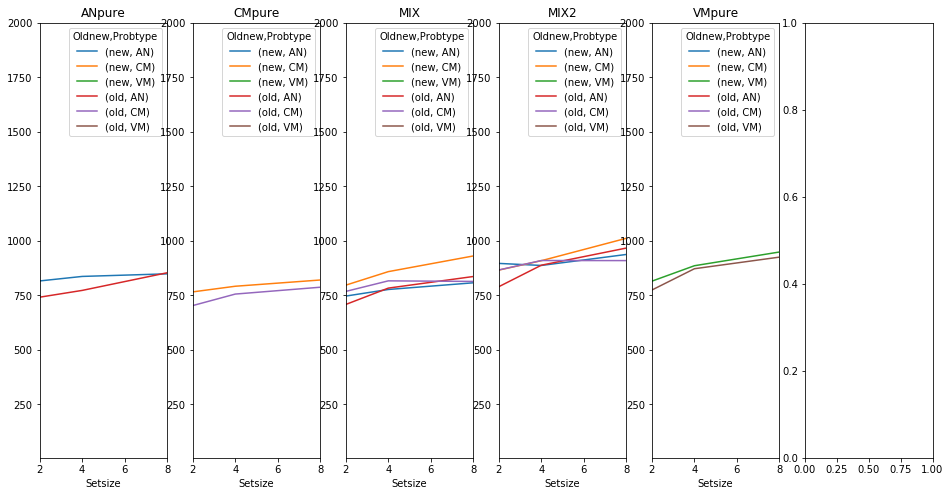

<Figure size 432x288 with 0 Axes>

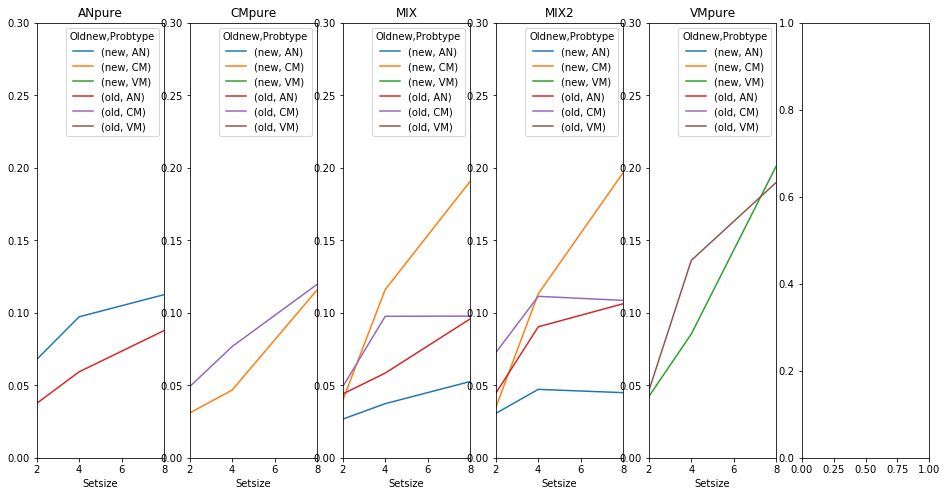

<Figure size 432x288 with 0 Axes>

In [49]:
df_crt_pred = finalRW(df_crt,"crt")
df_err_pred = finalRW(df_err,"err")

# all_plot(df_crt_pred,"Pred_cRT",(500,2000))
all_plot(df_crt_pred,"RT",(5,2000))
#     all_plot(df_err_pred,"Pred_error",(0,0.3))
all_plot(df_err,"Error",(0,0.3))

## real try

In [25]:
fitsel = pd.read_csv("alltry4_2_11_18_10_04.csv")
fitsel=fitsel.iloc[:,1:36]
fitsel

,alpha,beta,s,c_ANpure,c_CMpure,c_MIX,c_MIX2,c_VMpure,BDDo_ANpure,BDDn_ANpure,...,F_VMpure_VM_oldiold_oldinew,L_VMpure,F_MIX_CM_oldiold_oldinew,L_MIX_CM_oldiold_newinew,L_MIX_CM_oldinew_newiold,F_MIX_AN_oldiold_oldinew,F_MIX2_CM_oldiold_oldinew,L_MIX2_CM_oldiold_newinew,L_MIX2_CM_oldinew_newiold,F_MIX2_AN_oldiold_oldinew
0,0.37152748649992845,1.304101213278158,0.02661963230739423,0.5009171702276685,0.4631782828341572,0.5962474617259164,0.3990500482292131,0.48516026168276816,2.072529903768929,-5.813692630092848,...,0.1659557297687753,0.0037664977764179848,0.039646628720525164,0.07941594990572637,0.06941594990573532,0.0001,0.18491691047794612,0.010099999999998912,0.0001,0.15963889504073123
1,0.24249173064123572,1.8879784497778136,0.04101985853672085,0.36864576778975117,0.7464516017645678,0.5014133495228665,0.31997992246193463,0.41979058493911137,4.060709644638001,-6.2874514083327435,...,0.23216168273443488,0.0001,0.03599076878700342,0.11756697092083361,0.10756697091808265,0.00010000000260276495,0.2011910353033009,0.038971254935596326,0.028968034976005103,0.1805356127914421
2,0.458218338331885,1.058961461811212,0.020068595379324934,0.47599816758191554,0.6691359918442765,0.72159359610774,0.4811862620793409,0.5663989798433366,3.190489740233306,-3.05878618625973,...,0.20273355712039826,0.00010000000000006216,0.10456649534312704,0.06510292328401523,0.05510292328401522,0.0625290203662814,0.2244268886478326,0.01009999999999997,0.0001,0.2001195743041895
3,0.1 ~ 2.9,0.01 ~ 4.0,0.01 ~ 0.999,0.01 ~ 0.99,0.01 ~ 0.99,0.01 ~ 0.99,0.01 ~ 0.99,0.01 ~ 0.99,1.0 ~ 10.0,-10.0 ~ 1.0,...,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0,0.0001 ~ 1.0


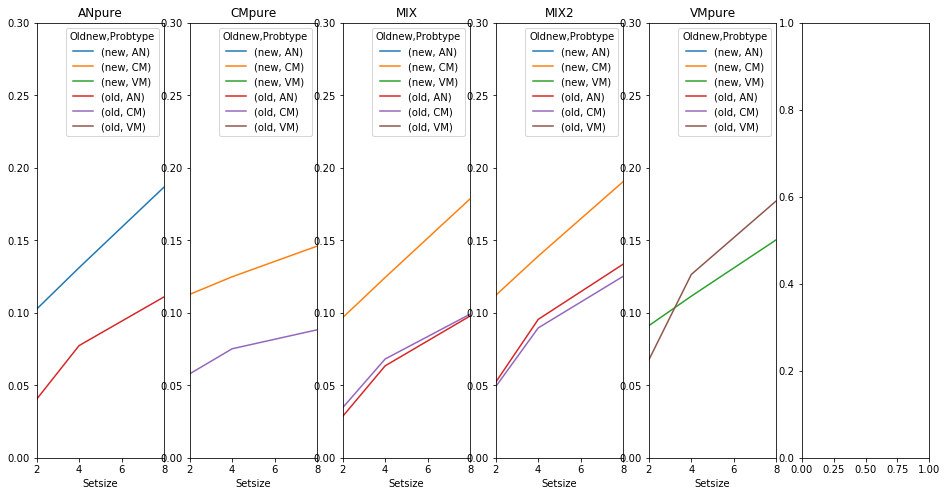

<Figure size 432x288 with 0 Axes>

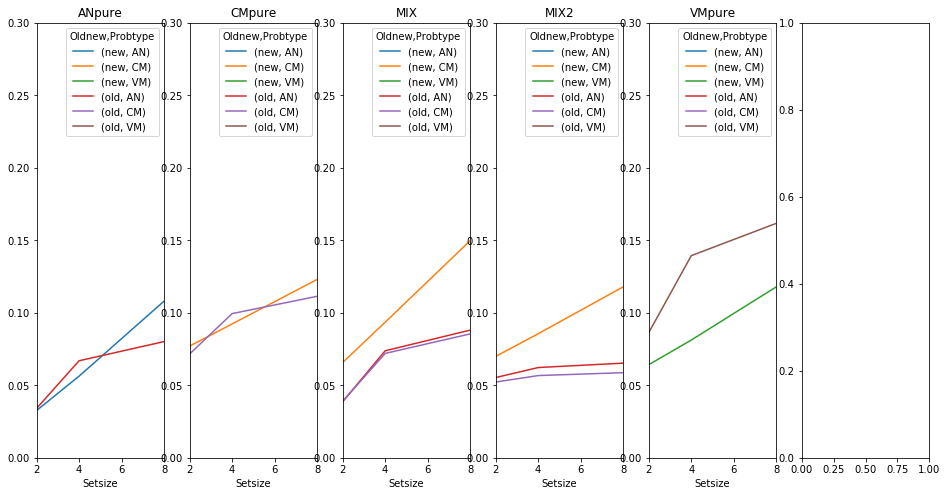

<Figure size 432x288 with 0 Axes>

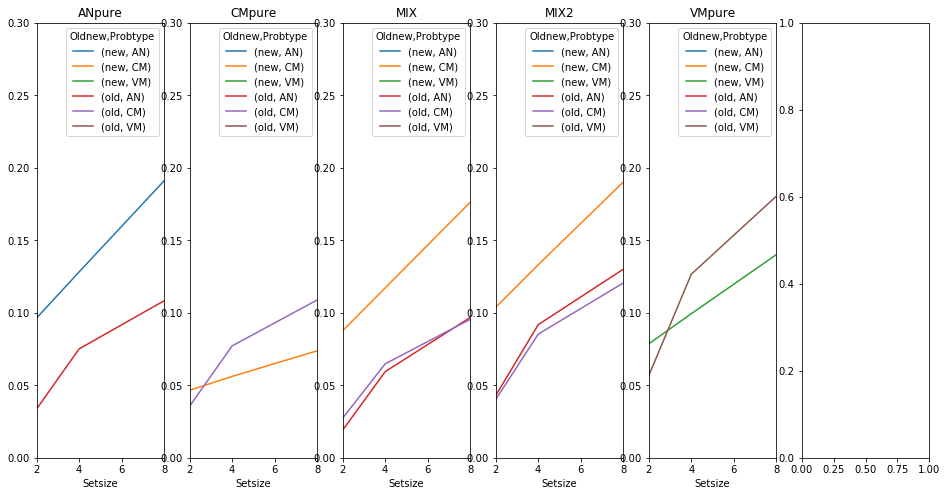

<Figure size 432x288 with 0 Axes>

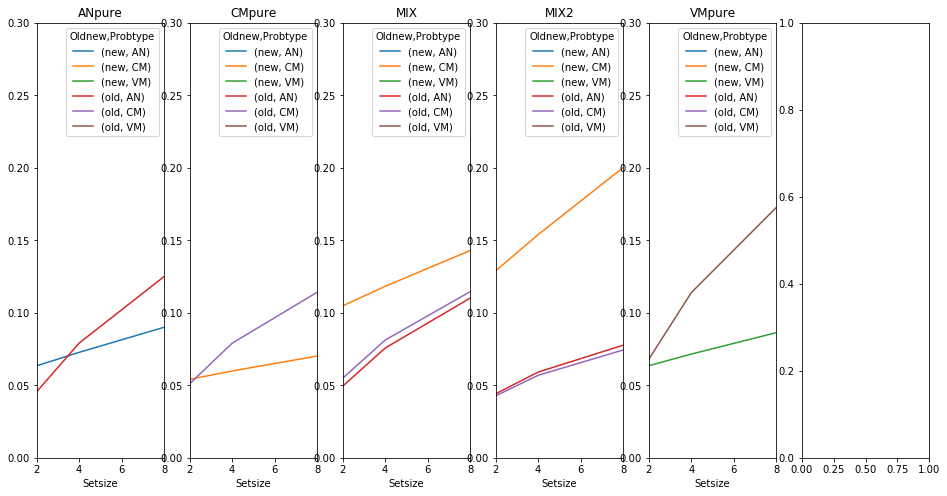

<Figure size 432x288 with 0 Axes>

3


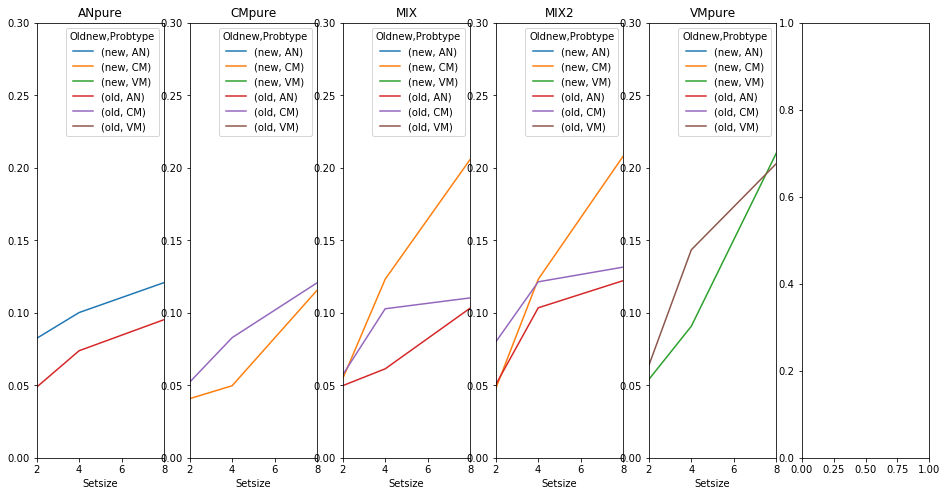

<Figure size 432x288 with 0 Axes>

In [47]:
for i in range(fitsel.shape[0]-1):
    [alpha["all"],beta["all"],s["all"],
c["ANpure"],c["CMpure"],c["VMpure"], c["MIX"] ,c["MIX2"] ,
Old_crit["ANpure"] ,New_crit["ANpure"] ,Old_crit["CMpure"] ,New_crit["CMpure"] ,
Old_crit["VMpure"] ,New_crit["VMpure"] ,Old_crit["MIX"] ,New_crit["MIX"] ,Old_crit["MIX2"] ,New_crit["MIX2"] ,
t0["all"] ,t0["ann"] ,kao,
F["ANpure_AN_oldiold_oldinew"] ,F["CMpure_CM_oldiold_oldinew"] ,L["CMpure_CM_oldiold_newinew"] ,L["CMpure_CM_oldinew_newiold"] ,
F["VMpure_VM_oldiold_oldinew"] , L["VMpure"], 
F["MIX_CM_oldiold_oldinew"], L["MIX_CM_oldiold_newinew"], L["MIX_CM_oldinew_newiold"], F["MIX_AN_oldiold_oldinew"], 
F["MIX2_CM_oldiold_oldinew"], L["MIX2_CM_oldiold_newinew"], L["MIX2_CM_oldinew_newiold"], F["MIX2_AN_oldiold_oldinew"]] =\
    fitsel.iloc[i,:].astype(float).to_list()
    df_crt_pred = finalRW(df_crt,"crt")
    df_err_pred = finalRW(df_err,"err")

#     all_plot(df_crt_pred,"Pred_cRT",(500,2000))
#     all_plot(df_crt_pred,"RT",(5,2000))
    all_plot(df_err_pred,"Pred_error",(0,0.3))
    if i==fitsel.shape[0]-2:
        print(i)
        all_plot(df_err,"Error",(0,0.3))

0


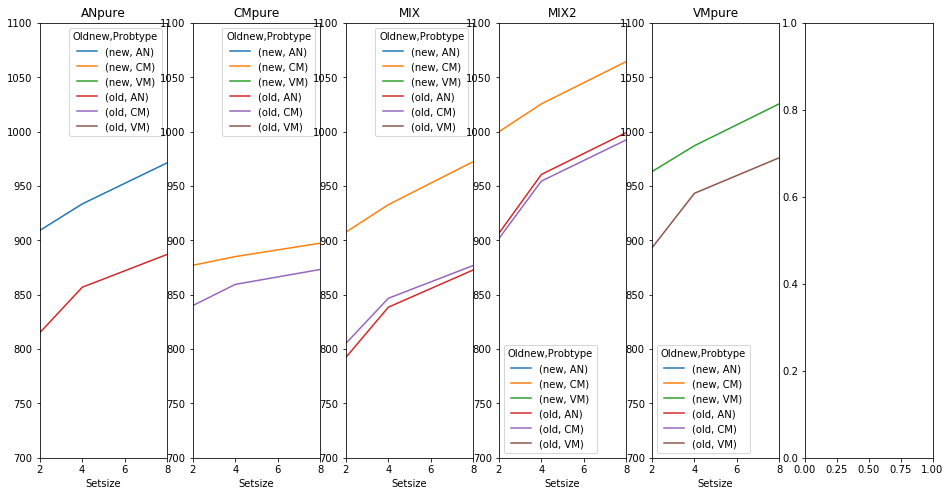

<Figure size 432x288 with 0 Axes>

1


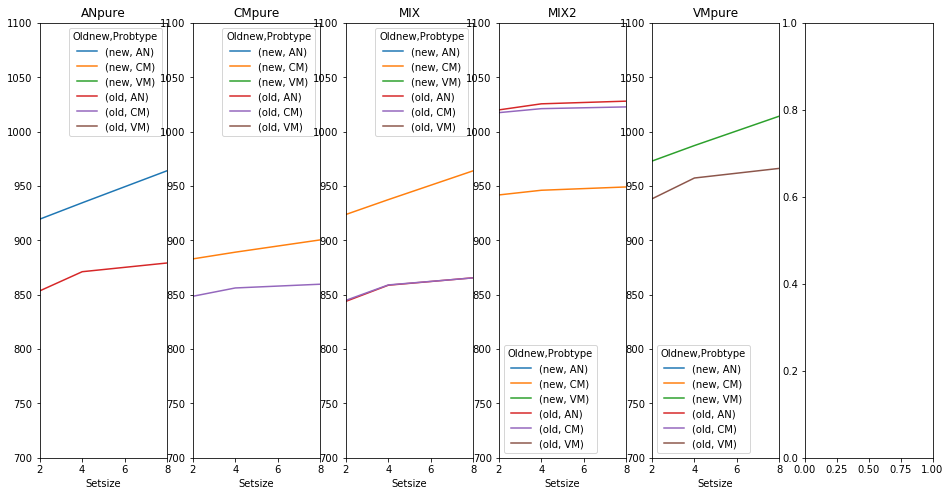

<Figure size 432x288 with 0 Axes>

2


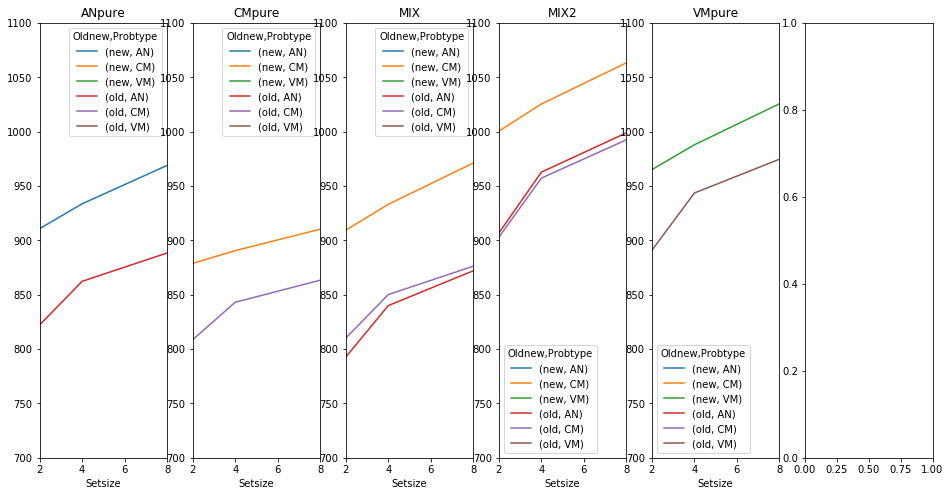

<Figure size 432x288 with 0 Axes>

3


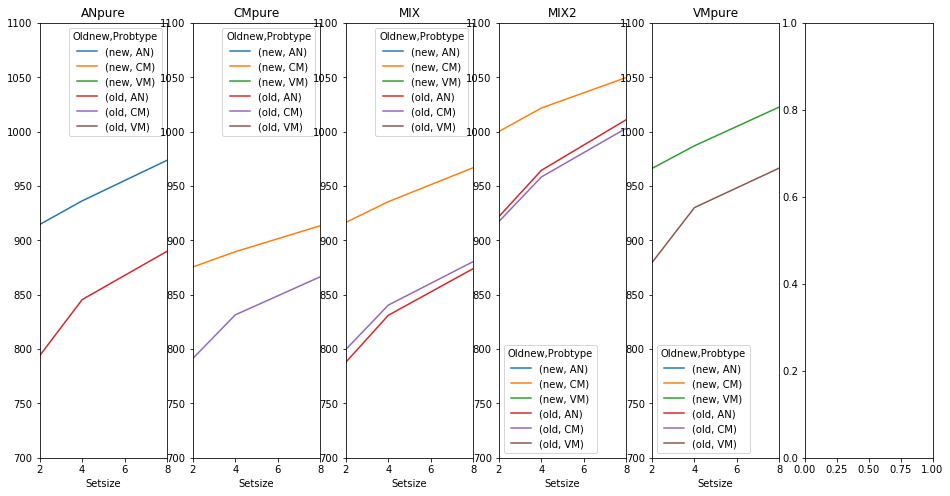

<Figure size 432x288 with 0 Axes>

3


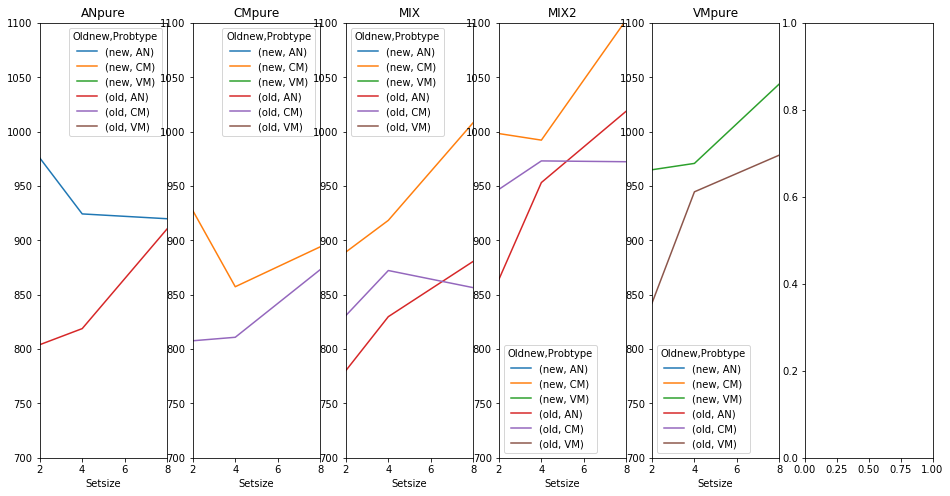

<Figure size 432x288 with 0 Axes>

In [50]:
for i in range(fitsel.shape[0]-1):
    [alpha["all"],beta["all"],s["all"],
c["ANpure"],c["CMpure"],c["VMpure"], c["MIX"] ,c["MIX2"] ,
Old_crit["ANpure"] ,New_crit["ANpure"] ,Old_crit["CMpure"] ,New_crit["CMpure"] ,
Old_crit["VMpure"] ,New_crit["VMpure"] ,Old_crit["MIX"] ,New_crit["MIX"] ,Old_crit["MIX2"] ,New_crit["MIX2"] ,
t0["all"] ,t0["ann"] ,kao,
F["ANpure_AN_oldiold_oldinew"] ,F["CMpure_CM_oldiold_oldinew"] ,L["CMpure_CM_oldiold_newinew"] ,L["CMpure_CM_oldinew_newiold"] ,
F["VMpure_VM_oldiold_oldinew"] , L["VMpure"], 
F["MIX_CM_oldiold_oldinew"], L["MIX_CM_oldiold_newinew"], L["MIX_CM_oldinew_newiold"], F["MIX_AN_oldiold_oldinew"], 
F["MIX2_CM_oldiold_oldinew"], L["MIX2_CM_oldiold_newinew"], L["MIX2_CM_oldinew_newiold"], F["MIX2_AN_oldiold_oldinew"]] =\
    fitsel.iloc[i,:].astype(float).to_list()
    df_crt_pred = finalRW(df_crt,"crt")
    df_err_pred = finalRW(df_err,"err")
    
    print(i)
    all_plot(df_crt_pred,"Pred_cRT",(700,1100))
#     all_plot(df_crt_pred,"RT",(5,2000))
#     all_plot(df_err_pred,"Pred_error",(0,0.3))
    if i==fitsel.shape[0]-2:
        print(i)
        all_plot(df_crt_pred,"RT",(700,1100))

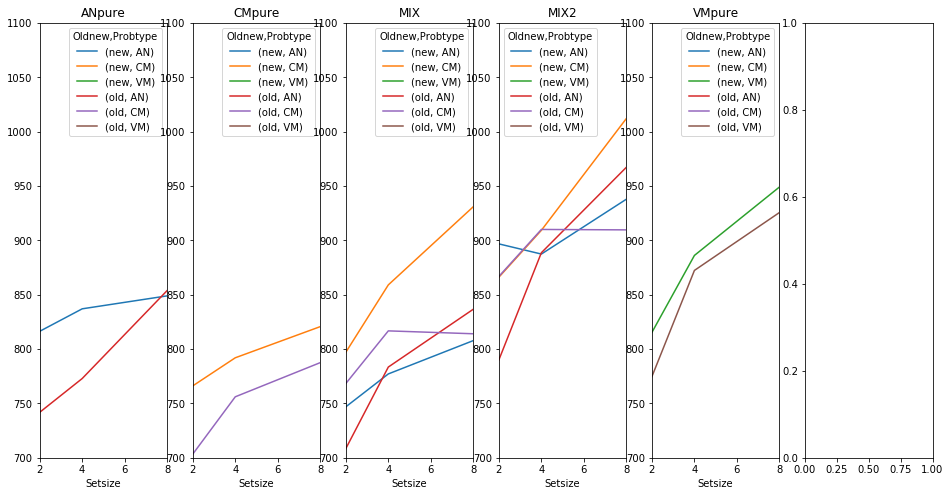

<Figure size 432x288 with 0 Axes>

In [50]:
all_plot(df_crt_pred,"Pred_cRT",(700,1100))
all_plot(df_crt_pred,"RT",(700,1100))

In [224]:
source("functions_fromr.r")

In [361]:
%get df_crt_pred --from Python3
%get df_err_pred --from Python3
%get df0 --from Python3

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


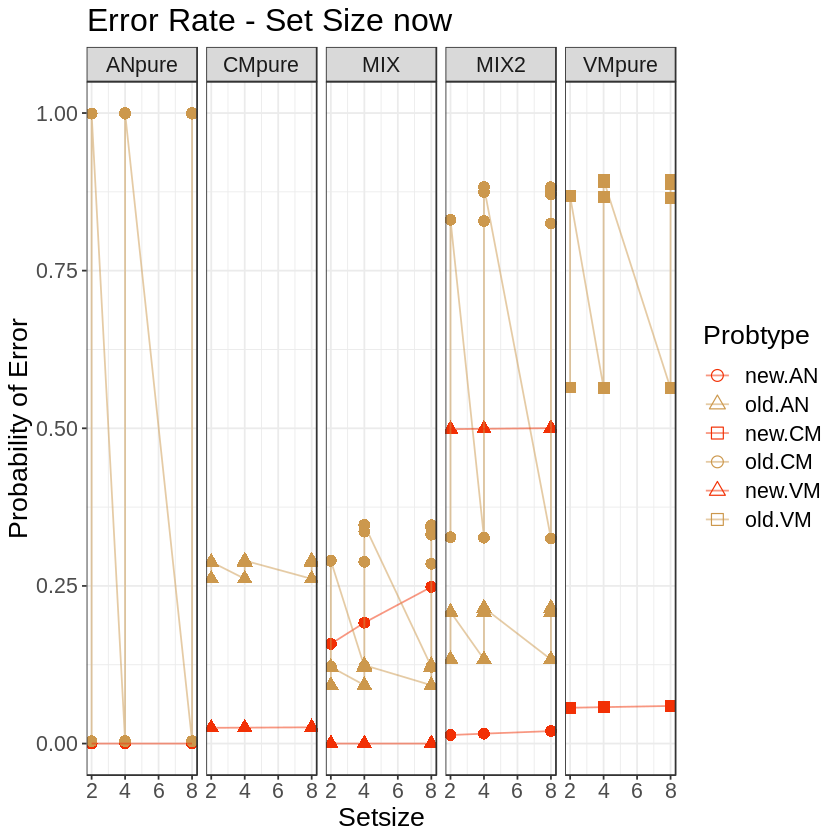

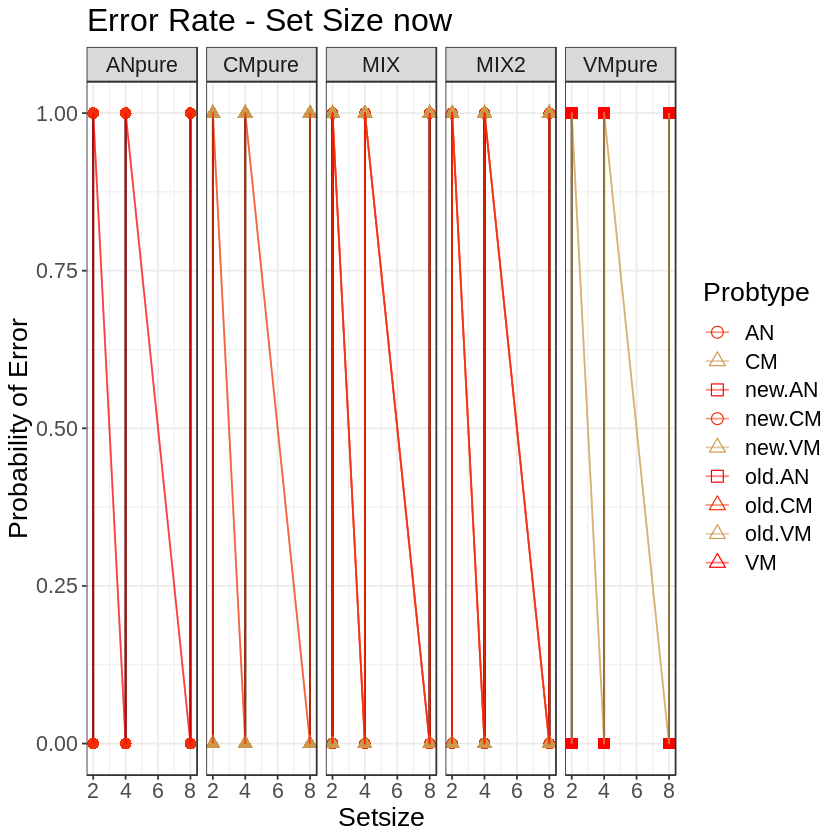

In [382]:
p.ER.pred=function(d,tit){
    override.shape = c(1,2,0,1,2,0)
  p=ggplot(data=d,aes(Setsize,Pred_error))+
    geom_point(aes(color=interaction(Oldnew,Probtype),shape=as.factor(Probtype),group=Oldnew),size=3)+
      geom_line(aes(color=interaction(Oldnew,Probtype),#linetype=as.factor(FileCondi),
                    group=interaction(Oldnew,Probtype)),lwd=0.5,alpha=0.5)+
      scale_color_manual(name="Probtype",
                         values=c(rep(c("#F23005","#CC984D"),3)))+
    scale_shape_discrete(guide=FALSE)+
    ggtitle(paste("Error Rate - Set Size",tit))+
    theme_bw()+
    theme(text=element_text(size=16))+
    ylim(0,0.25)+
    guides(colour = guide_legend(override.aes=list(shape=override.shape)))+
    facet_wrap(FileCondi~.,ncol=6)+
    scale_y_continuous("Probability of Error")
  return(p)
}
p.ER.org=function(d,tit){
    override.shape = c(1,2,0,1,2,0,2,2,2)
  d0= d 
  dase= d %>% group_by(FileCondi,Oldnew,Setsize,Probtype,Correctness) %>%
    dplyr::summarize(Error=mean(Correctness),se=sd(Correctness)/sqrt(n()))
  # print(dase)
  da1se=dase
  p=ggplot(data=da1se,aes(Setsize,Error))+
    geom_errorbar(aes(ymin=(Error-se), ymax=(1-Correctness)+se), width=.2,
                  position=position_dodge(.9),alpha=0.5) +
    geom_point(aes(color=Probtype,shape=as.factor(Probtype),group=Oldnew),size=3)+
      geom_line(aes(color=interaction(Oldnew,Probtype),#linetype=as.factor(FileCondi),
                    group=interaction(Oldnew,Probtype)),lwd=0.5,alpha=0.5)+
      scale_color_manual(name="Probtype",
                         values=c(rep(c("#F23005","#CC984D","red"),3)))+
    scale_shape_discrete(guide=FALSE)+
    ggtitle(paste("Error Rate - Set Size",tit))+
    theme_bw()+
    theme(text=element_text(size=16))+
    ylim(0,0.25)+
    guides(colour = guide_legend(override.aes=list(shape=override.shape)))+
    facet_wrap(FileCondi~.,ncol=6)+
    scale_y_continuous("Probability of Error")#+
#     coord_fixed(ratio=0.08)
  return(p)
}
p.ER.pred(df_err_pred,"now")
p.ER.org(df0,"now")